### TP1: Quantitative Structure-Activity Relationship (QSAR)

Membres du Groupe 2: 
1- Couthon, Mahutondji Josué Friedman
2- Daouda, Abdou Rahime
3- Meuleghe Kenmegne, Laetitia



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('QSAR_dataset.xlsx')


In [3]:
data

,SMILES,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,Class 2,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,...,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
1,c12c(cccc1)cccc2,Class 2,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,...,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
2,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,Class -2,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,...,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
3,ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)...,Class -2,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,...,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
4,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,Class -2,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,...,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Clc1c(Cl)cc(-c2c(Cl)cc(Cl)cc2)cc1Cl,Class -1,35.353966,108.591640,369.80264,22,0,17.0,17,31.868664,...,274.55731,0.000000,253.96802,0.000000,0.189245,0.410473,-5.342964,NaN,326.43698,88
150,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.002380,74.775352,427.29446,22,0,19.0,17,34.823284,...,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
151,c12c3c(ccc1cccc2)cccc3,Class 0,31.307930,174.869430,178.80505,24,0,14.0,14,23.516850,...,198.75549,0.000000,166.91910,0.000000,0.098131,0.212847,NaN,-0.108926,178.23399,76
152,Clc1c(Cl)cc2c(oc3c2cc(Cl)c(Cl)c3)c1,Class 0,33.309174,104.919330,333.65930,21,0,17.0,14,33.219116,...,248.35408,0.000000,204.05783,0.000000,0.211047,0.457762,NaN,-0.234263,305.97501,96


In [4]:
df = data.drop("Class", axis = 1) #dataframe sans la colonne classe

In [5]:
df

,SMILES,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,14,...,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
1,c12c(cccc1)cccc2,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,10,...,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
2,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,12,...,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
3,ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)...,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,10,...,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
4,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,12,...,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Clc1c(Cl)cc(-c2c(Cl)cc(Cl)cc2)cc1Cl,35.353966,108.591640,369.80264,22,0,17.0,17,31.868664,12,...,274.55731,0.000000,253.96802,0.000000,0.189245,0.410473,-5.342964,NaN,326.43698,88
150,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],37.002380,74.775352,427.29446,22,0,19.0,17,34.823284,12,...,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
151,c12c3c(ccc1cccc2)cccc3,31.307930,174.869430,178.80505,24,0,14.0,14,23.516850,14,...,198.75549,0.000000,166.91910,0.000000,0.098131,0.212847,NaN,-0.108926,178.23399,76
152,Clc1c(Cl)cc2c(oc3c2cc(Cl)c(Cl)c3)c1,33.309174,104.919330,333.65930,21,0,17.0,14,33.219116,12,...,248.35408,0.000000,204.05783,0.000000,0.211047,0.457762,NaN,-0.234263,305.97501,96


In [6]:
df.describe()

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
count,154.000000,152.000000,153.000000,154.000000,154.000000,153.000000,154.000000,153.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,1.470000e+02,141.000000,136.000000,154.000000,154.000000
mean,34.610698,105.781739,359.928668,23.909091,0.292208,18.875817,17.350649,33.912102,11.649351,3.110390,...,273.307303,8.076532,239.944812,9.086768,2.379611,-6.802721e+08,-66.497364,-2.501405,359.813016,101.350649
std,5.951534,62.391286,111.225998,4.895461,0.862625,5.596428,5.028718,9.714722,2.472152,2.954031,...,52.783753,14.721655,59.915749,15.129738,2.637952,8.247861e+09,73.647379,2.807324,132.955027,33.487395
min,17.148172,8.778115,122.917570,12.000000,0.000000,10.000000,6.000000,12.000000,6.000000,0.000000,...,140.102050,0.000000,67.651054,0.000000,0.011998,-1.000000e+11,-209.769584,-8.247237,128.174000,46.000000
25%,31.534723,70.909811,330.864750,22.000000,0.000000,17.000000,16.000000,30.541887,12.000000,0.000000,...,246.182178,0.000000,203.302167,0.000000,0.124434,2.696068e-01,-132.566487,-5.058933,291.992000,88.000000
50%,35.579689,98.659012,389.503510,22.000000,0.000000,18.000000,17.000000,31.868664,12.000000,4.000000,...,281.160615,0.000000,253.968020,0.000000,0.376156,8.136986e-01,-10.648449,-0.411358,360.881990,94.000000
75%,38.401845,139.629990,427.294460,25.750000,0.000000,19.000000,18.000000,37.087944,12.000000,6.000000,...,295.503230,13.566921,272.261230,13.566921,4.786711,9.972196e+00,-3.509363,-0.133136,410.317990,106.000000
max,52.422001,356.764860,622.904600,43.000000,4.000000,43.000000,40.000000,86.319427,20.000000,10.000000,...,432.120120,59.150364,475.687620,59.150364,7.429943,1.611555e+01,-0.338738,-0.013318,959.170960,246.000000


In [7]:
df.isnull().sum()

SMILES      0
apol        0
ASA+        2
ASA-        1
a_count     0
           ..
vsurf_R     7
vsurf_S    13
vsurf_V    18
Weight      0
zagreb      0
Length: 75, dtype: int64

In [8]:
df.dtypes

SMILES      object
apol       float64
ASA+       float64
ASA-       float64
a_count      int64
            ...   
vsurf_R    float64
vsurf_S    float64
vsurf_V    float64
Weight     float64
zagreb       int64
Length: 75, dtype: object

In [9]:
# Transformer les valeurs de la colonne Class en valeurs numériques

data['Class'] = data['Class'].str.replace('Class', '')

data['Class'] = pd.to_numeric(data['Class'])

In [10]:
dataF = data.drop("SMILES", axis = 1)
correlations = dataF.corr()['Class'].abs()

sorted_correlations = correlations.sort_values(ascending=False)

top_10_attributes = sorted_correlations.index[2:]

print(top_10_attributes)

Index(['SlogP', 'logS', 'h_logP', 'h_logS', 'SMR', 'mr', 'vsa_hyd', 'chi1v',
       'chi0v', 'apol', 'vol', 'TPSA', 'RPC-', 'logP(o/w)', 'ASA-', 'bpol',
       'vsa_pol', 'PEOE_VSA_POL', 'PEOE_VSA_NEG', 'rgyr', 'PEOE_VSA_PPOS',
       'PEOE_VSA_PNEG', 'DASA', 'VSA', 'a_donacc', 'vdw_area', 'rsynth',
       'CASA+', 'dipole', 'a_nH', 'vsa_acc', 'PC-', 'vsurf_S', 'vsurf_V',
       'a_nF', 'vsurf_A', 'PC+', 'ASA+', 'balabanJ', 'Weight', 'a_count',
       'CASA-', 'VAdjMa', 'DCASA', 'radius', 'VDistEq', 'VAdjEq', 'npr2',
       'VDistMa', 'vdw_vol', 'std_dim3', 'density', 'a_hyd', 'a_nC', 'a_IC',
       'diameter', 'dens', 'pmi', 'pmi3', 'std_dim1', 'vsurf_R', 'chi1_C',
       'chi1v_C', 'chi1', 'pmi2', 'chi0_C', 'petitjeanSC', 'zagreb', 'chi0',
       'std_dim2', 'a_heavy', 'chi0v_C', 'petitjean'],
      dtype='object')


C:\Users\abdou\AppData\Local\Temp\ipykernel_2560\3356991101.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[attribute], bins=30, kde=False)


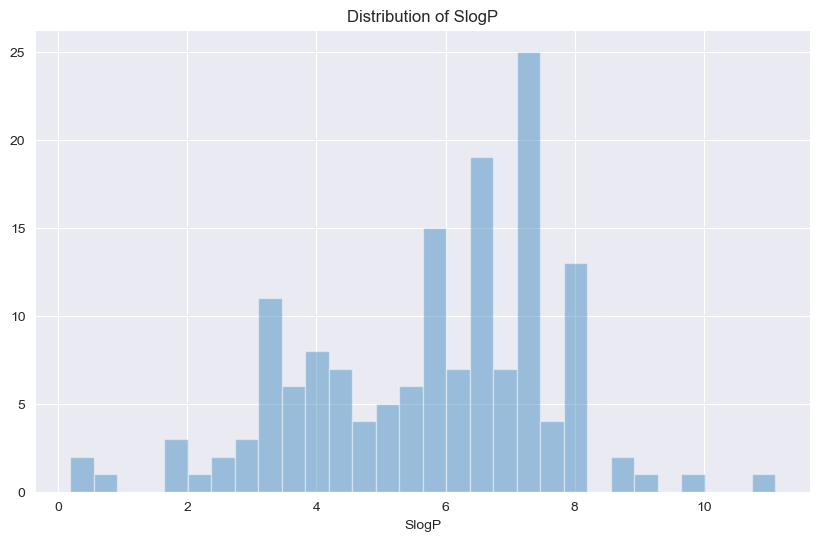

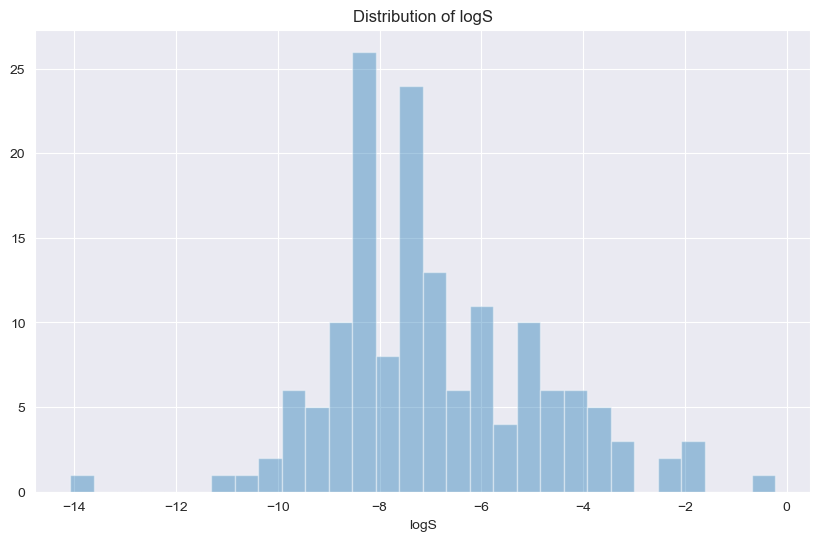

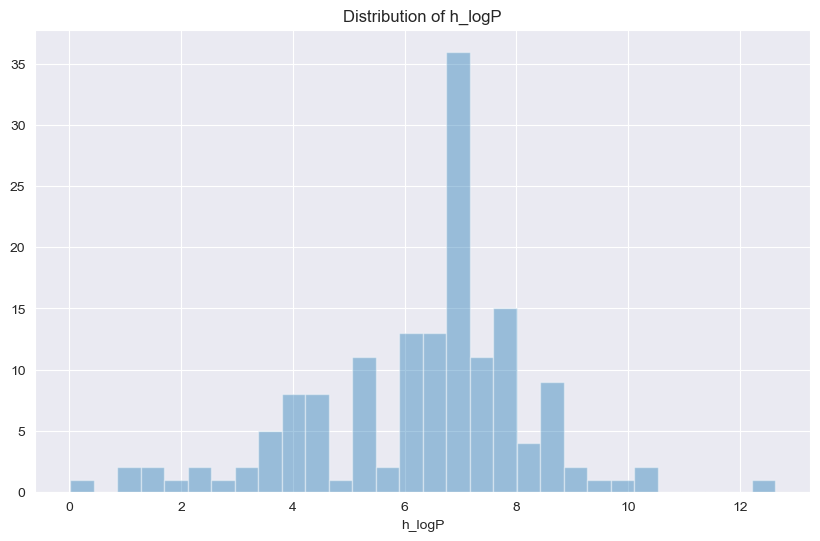

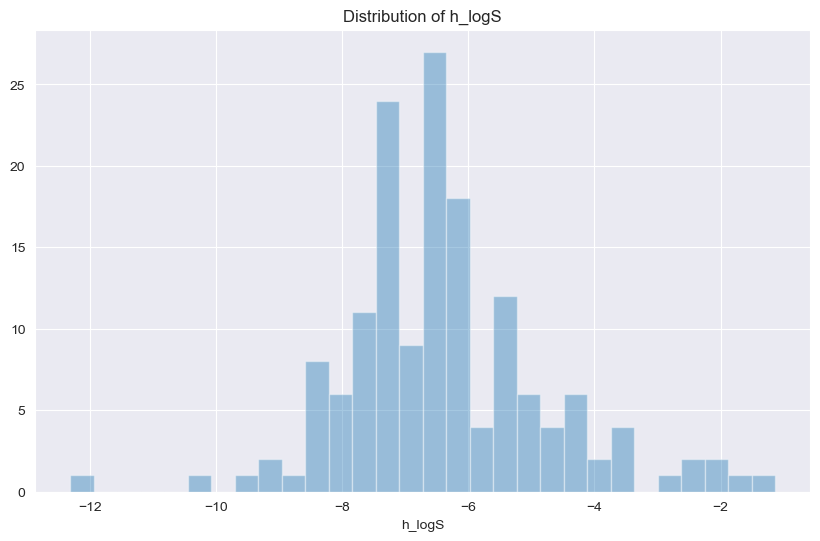

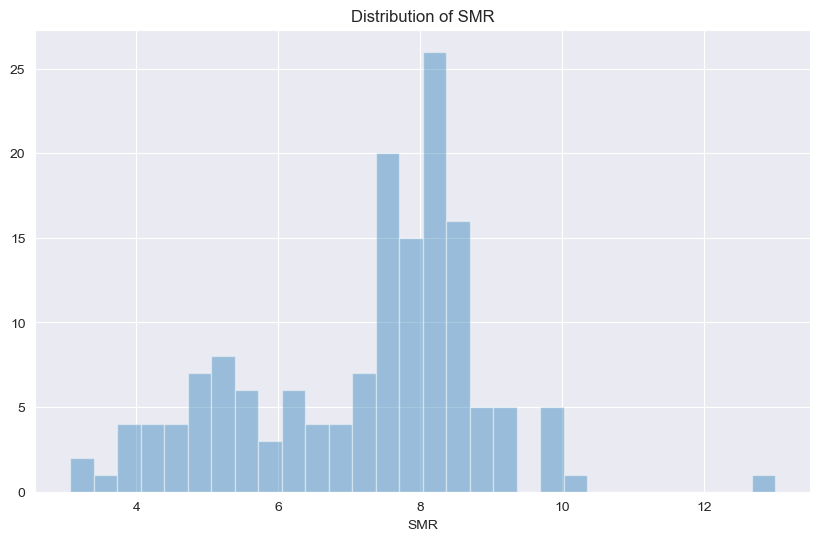

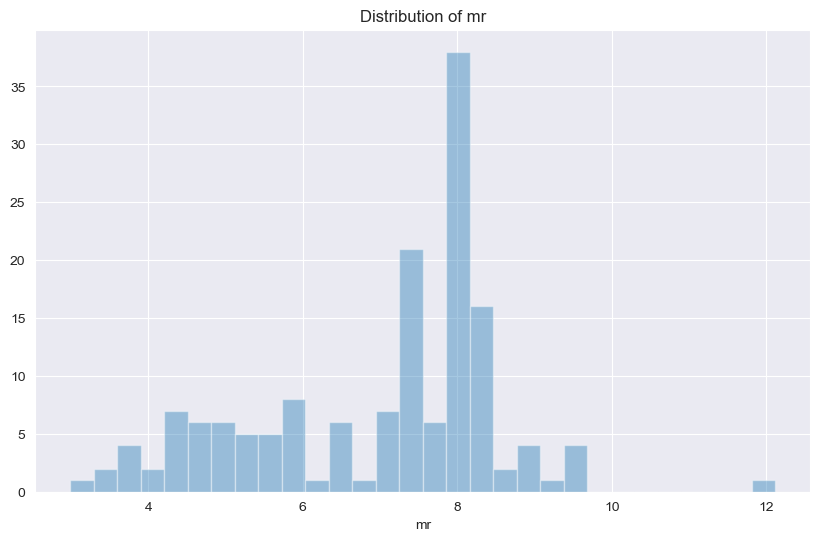

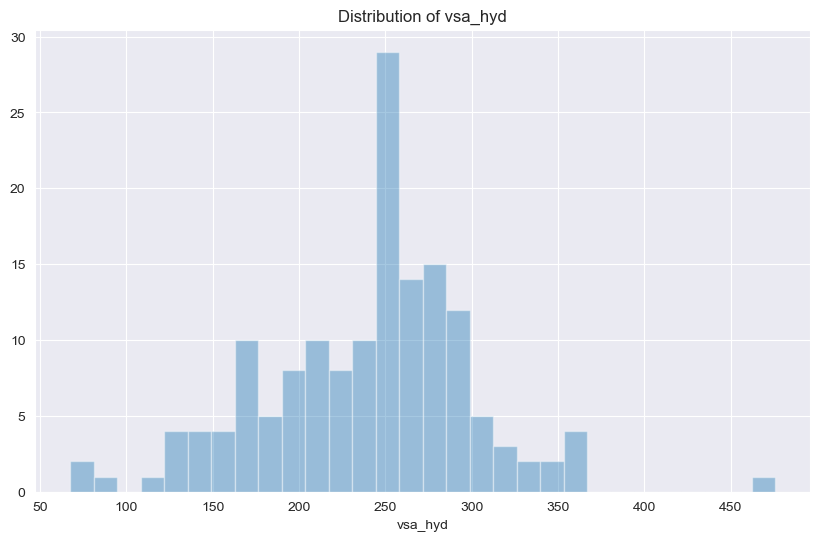

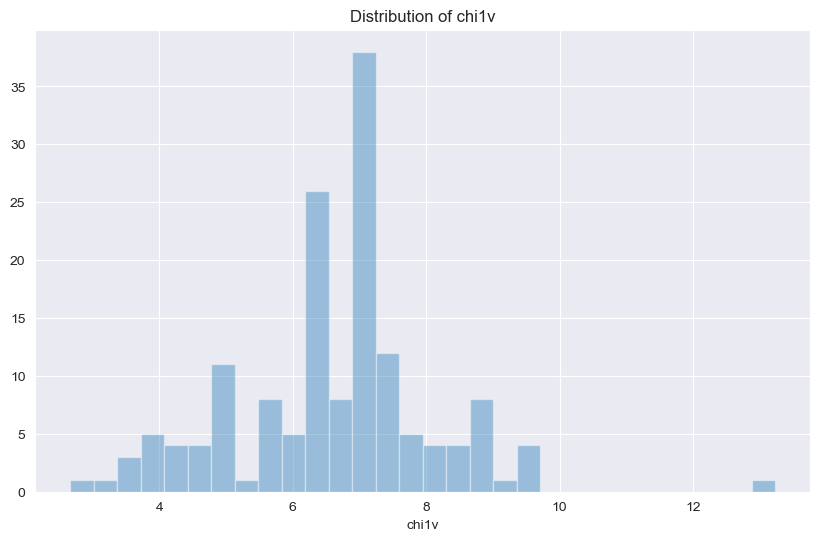

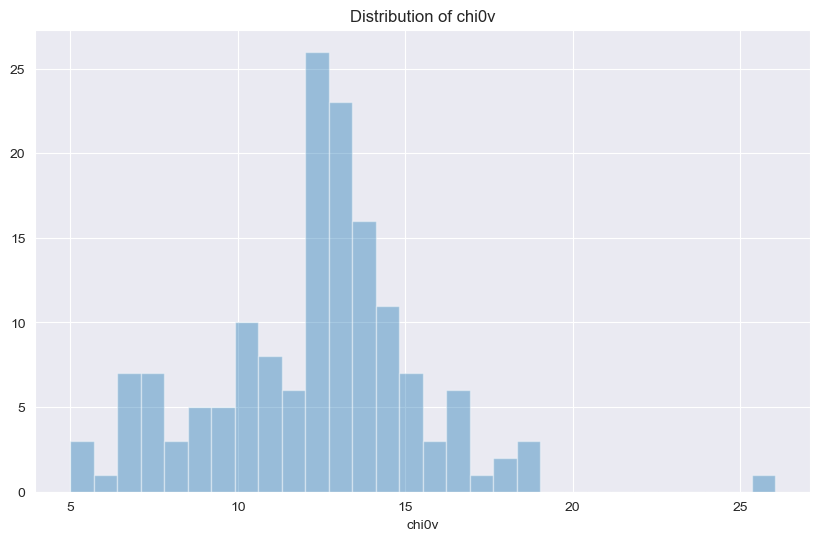

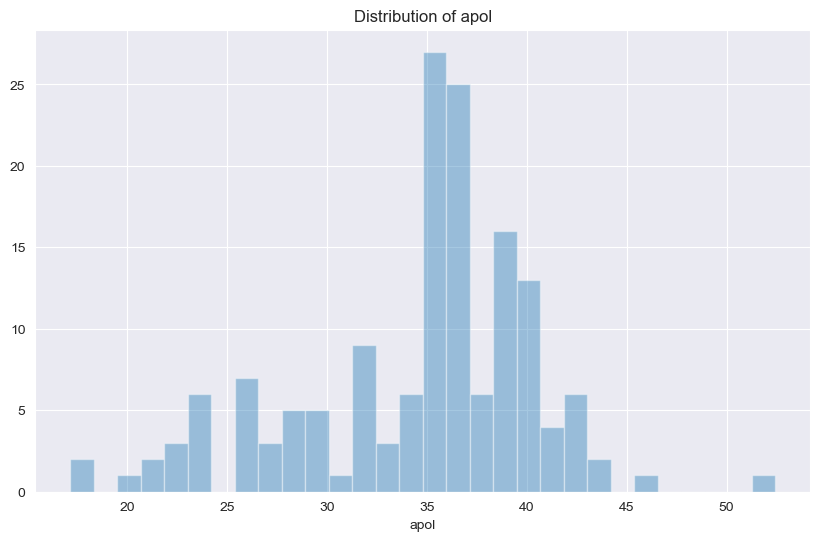

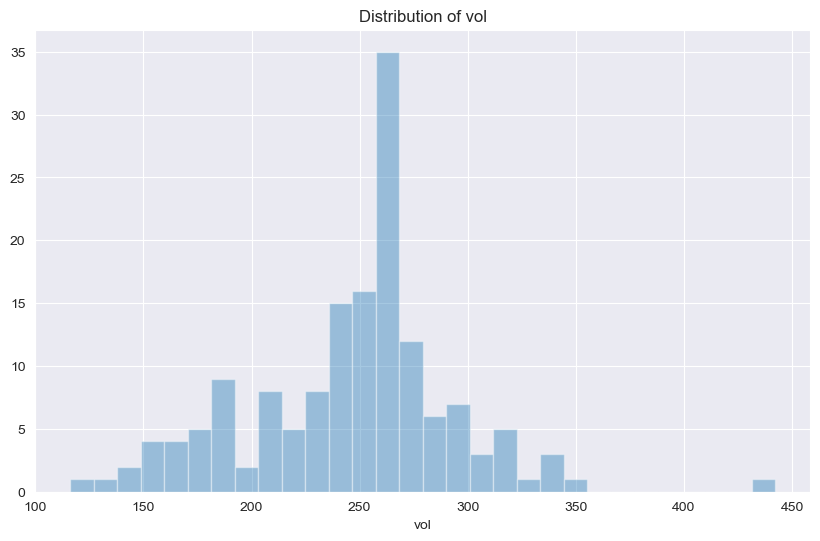

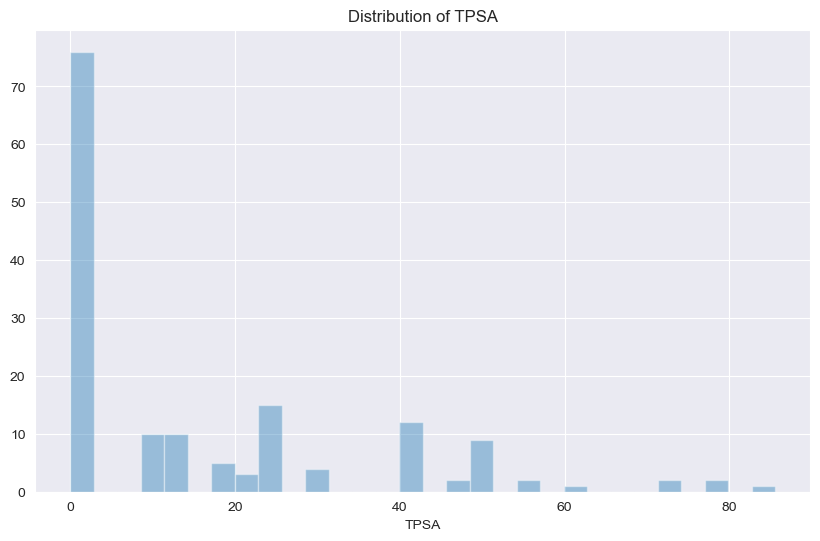

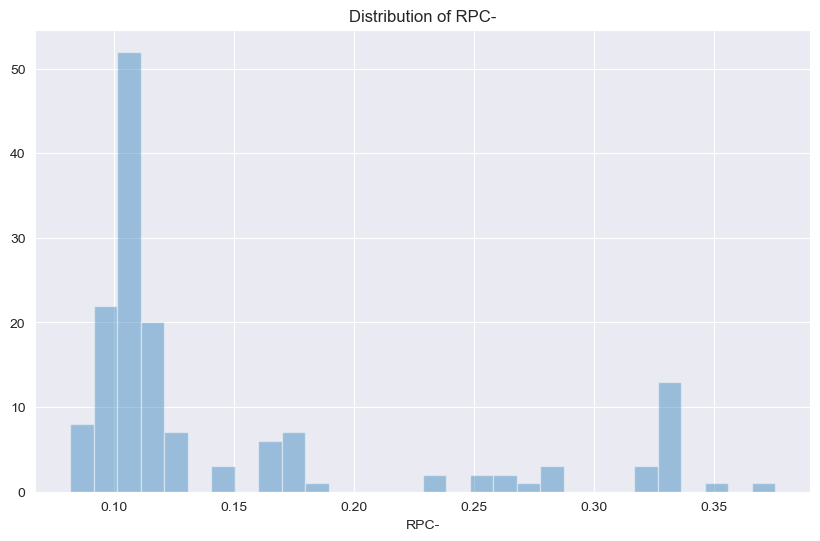

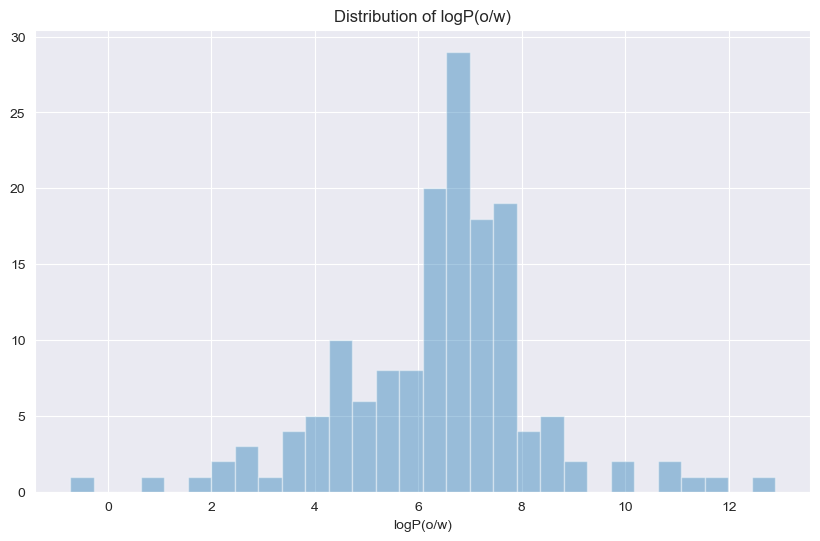

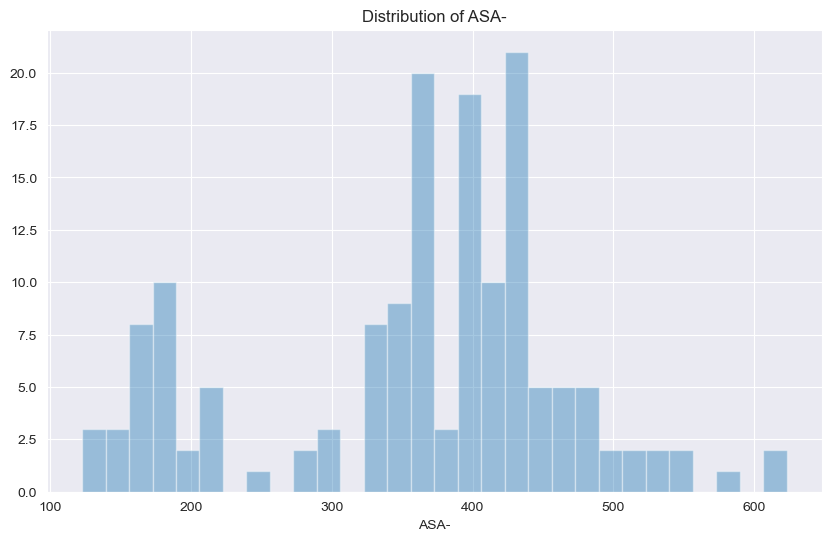

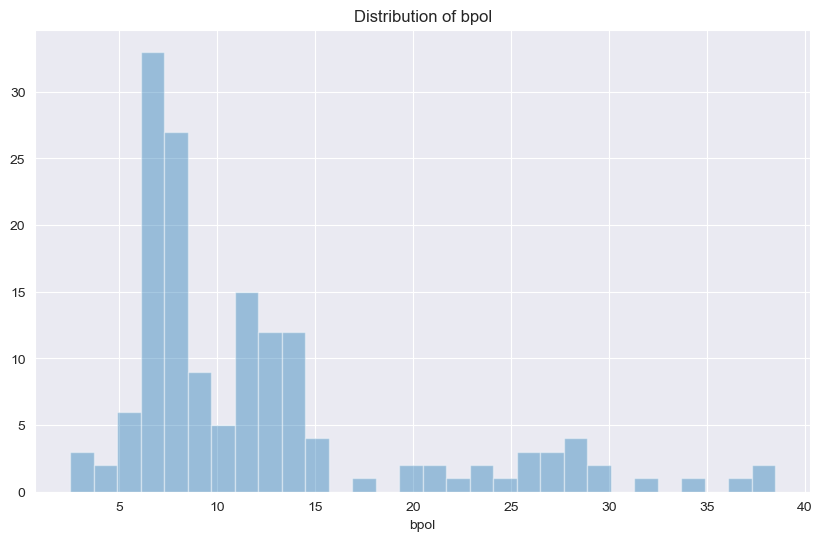

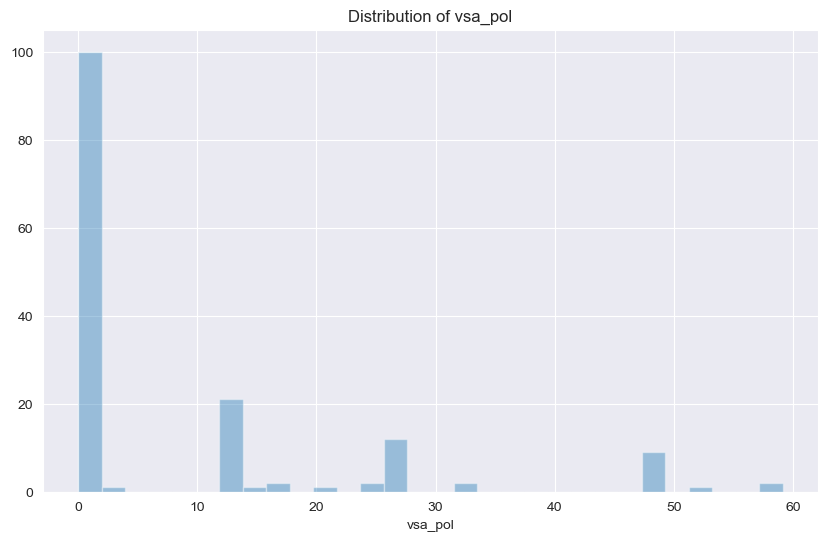

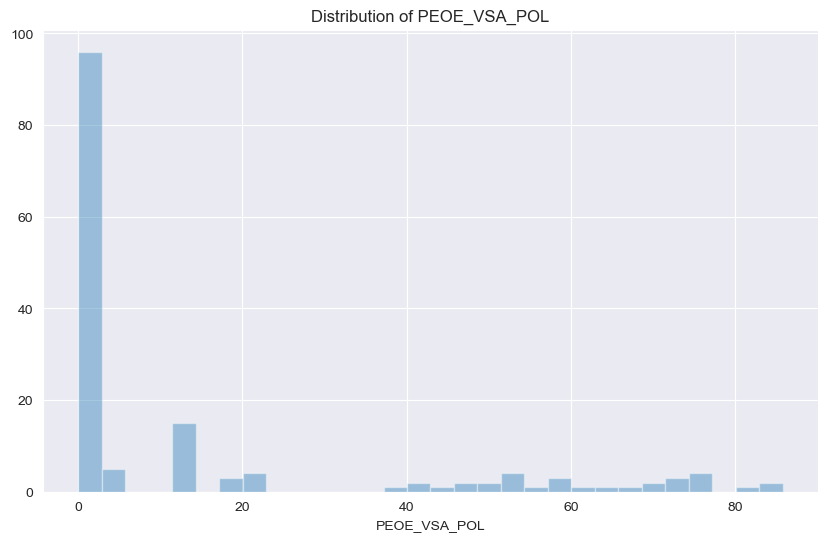

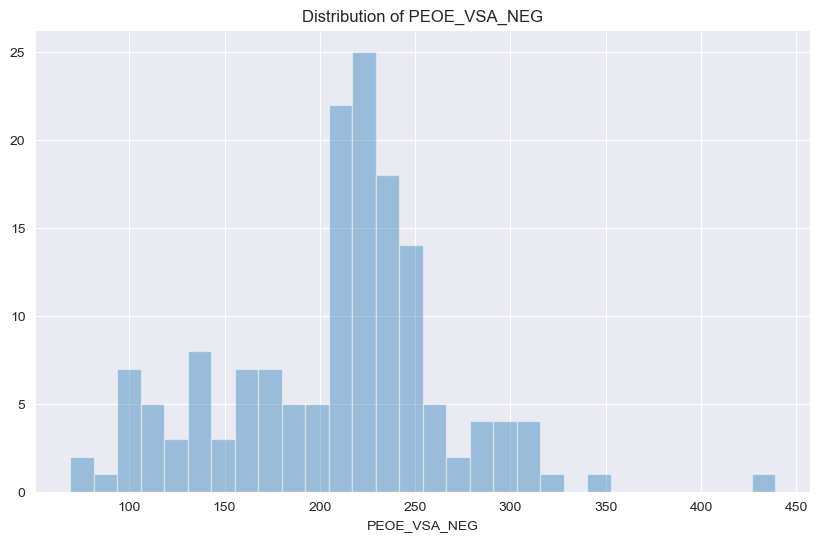

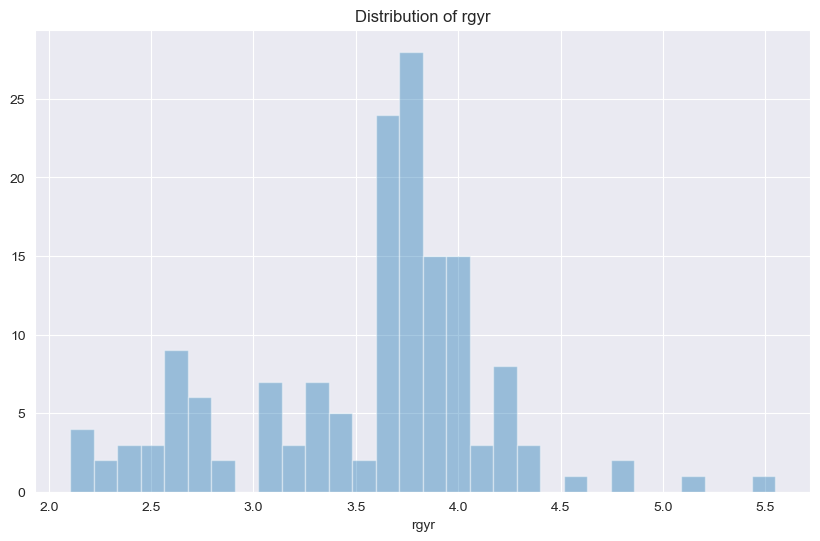

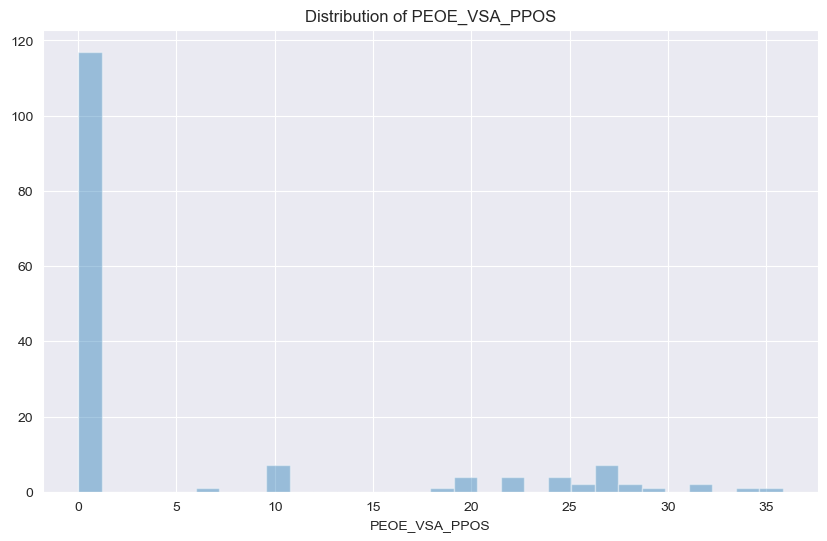

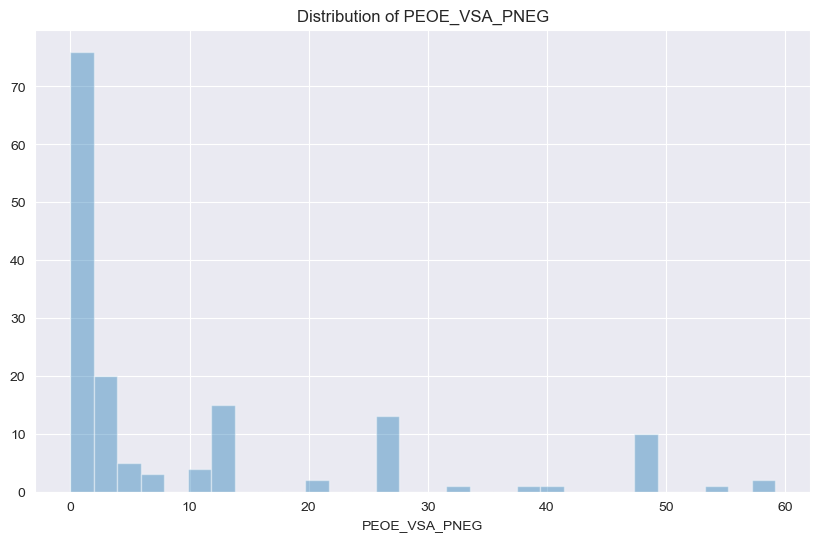

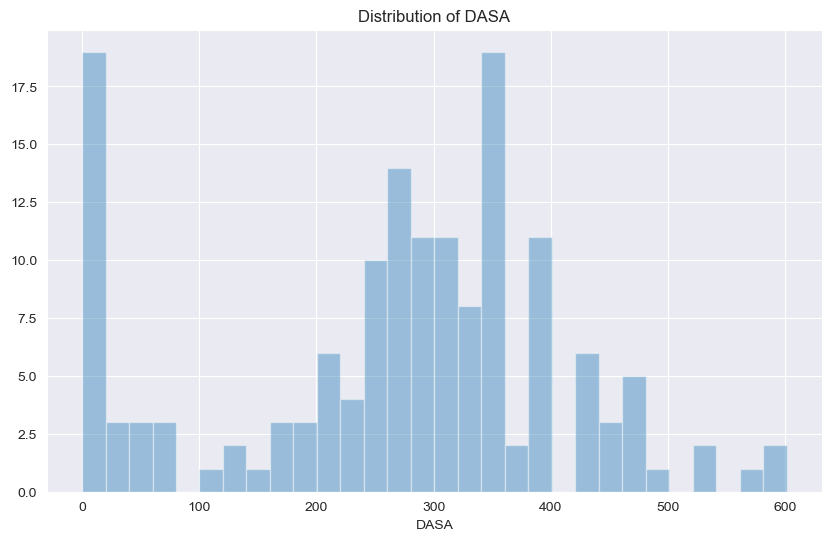

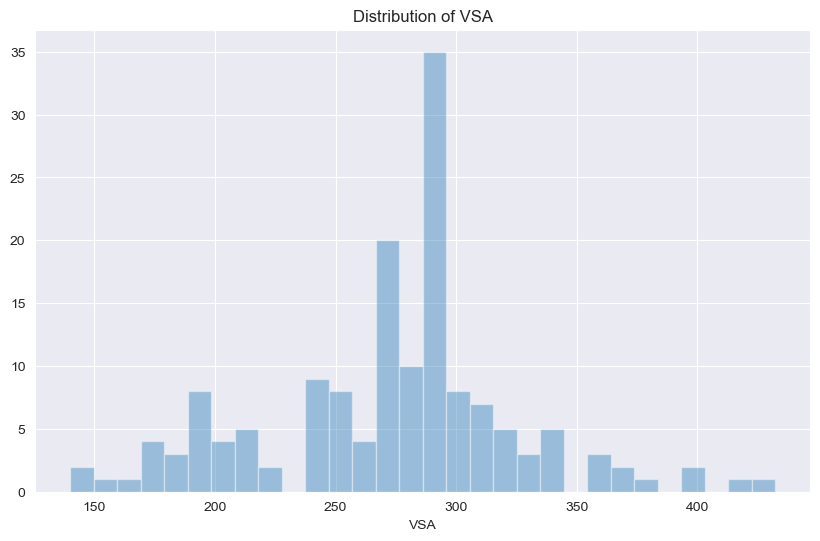

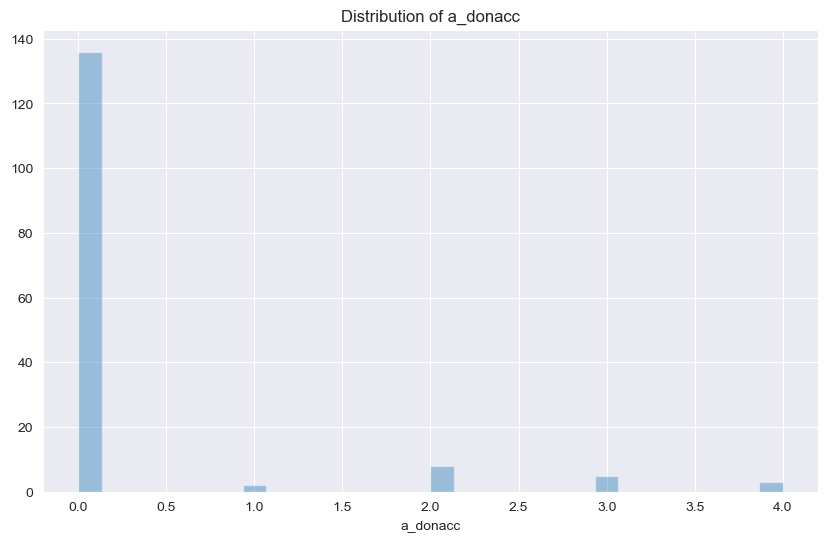

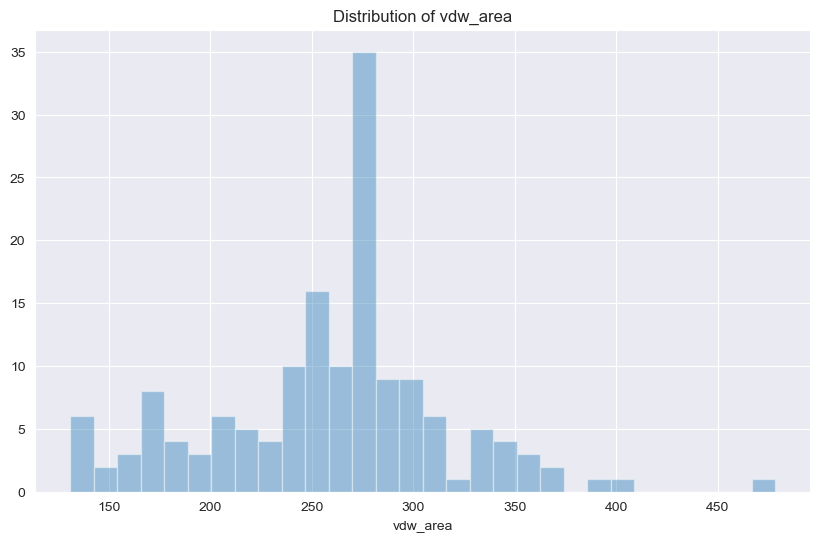

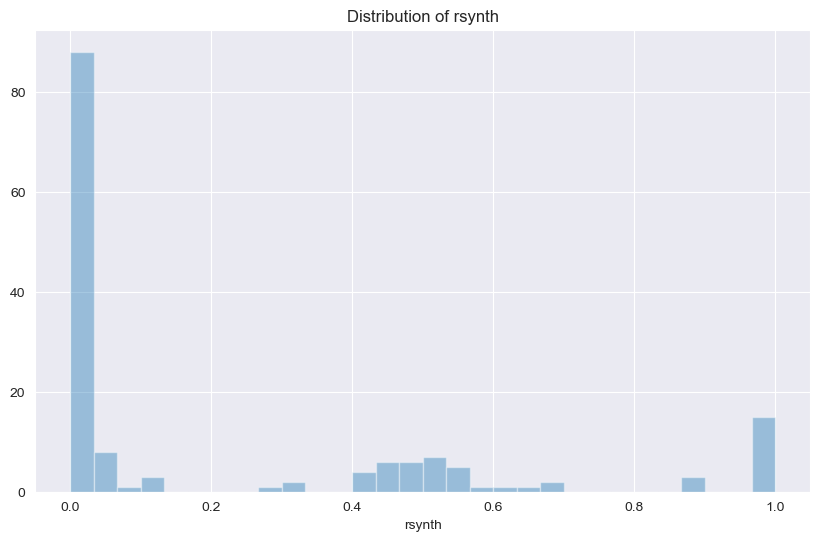

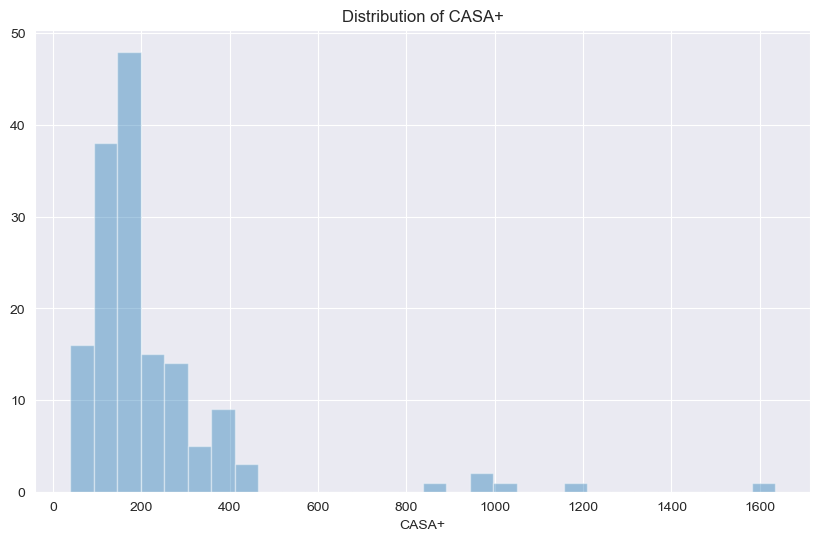

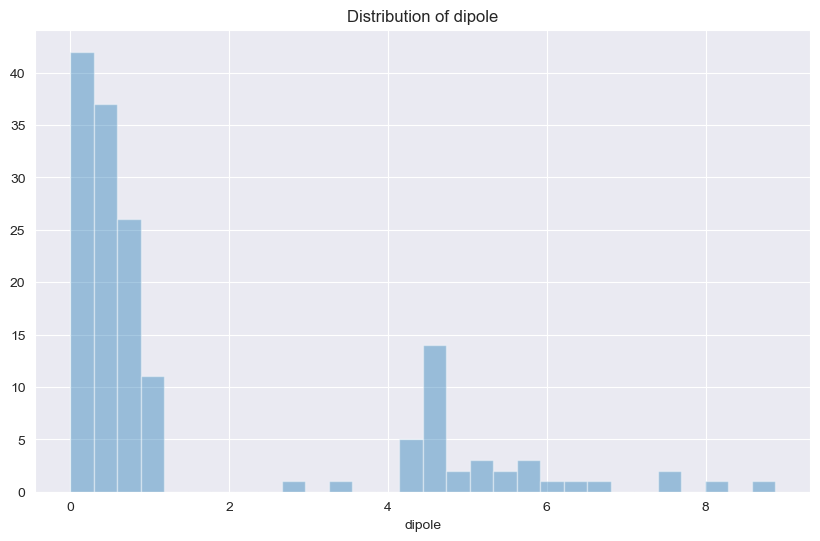

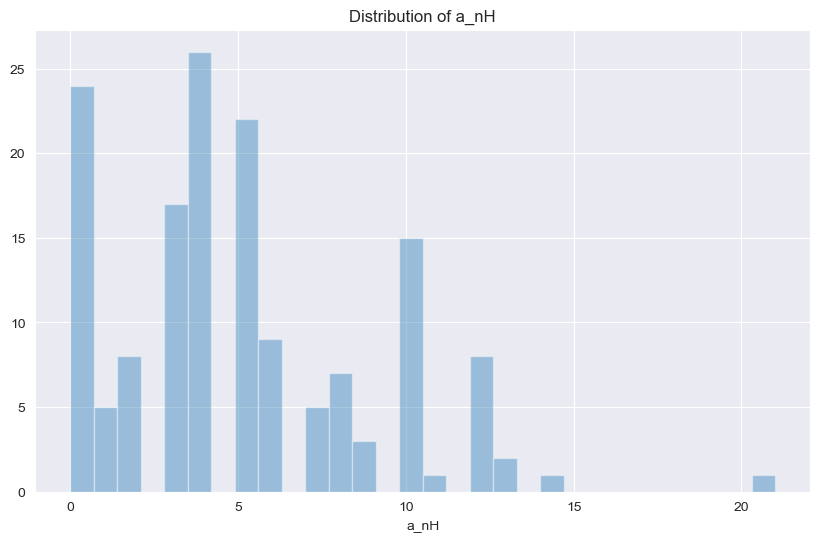

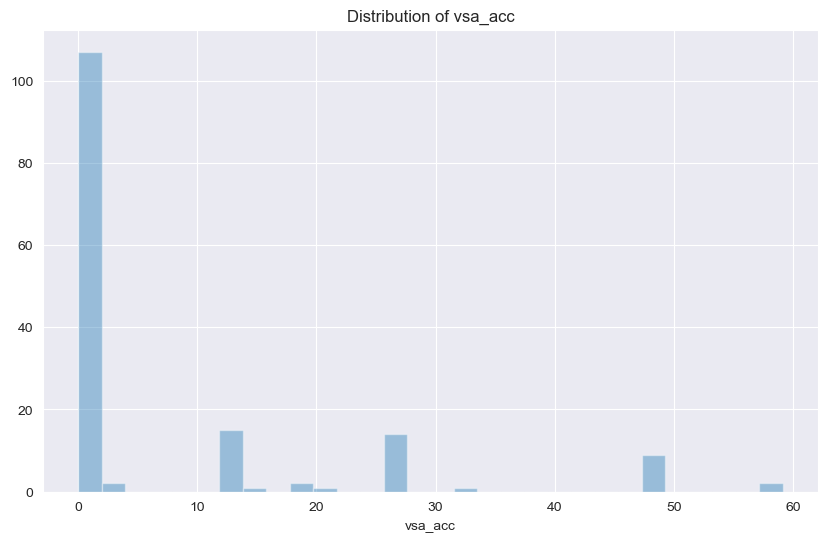

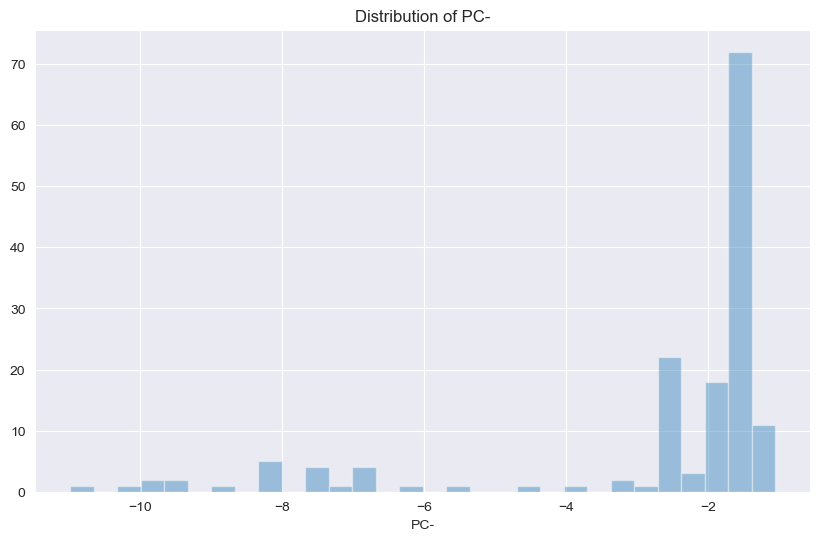

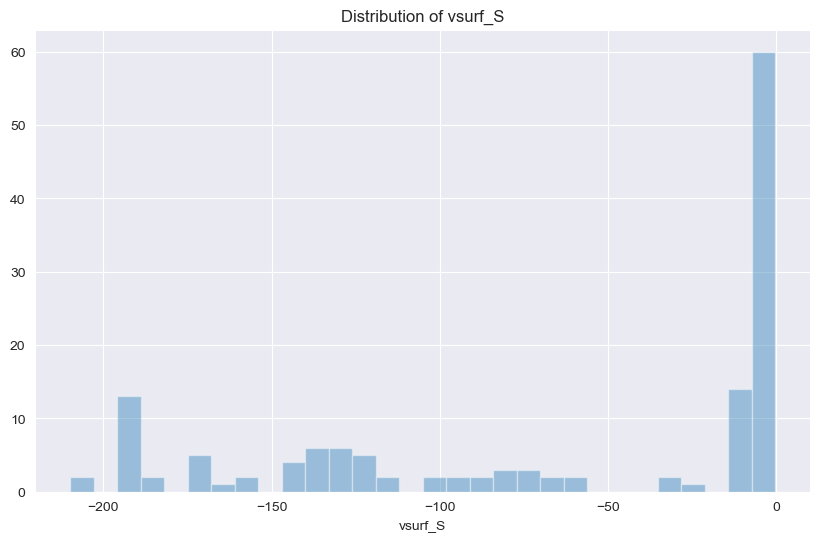

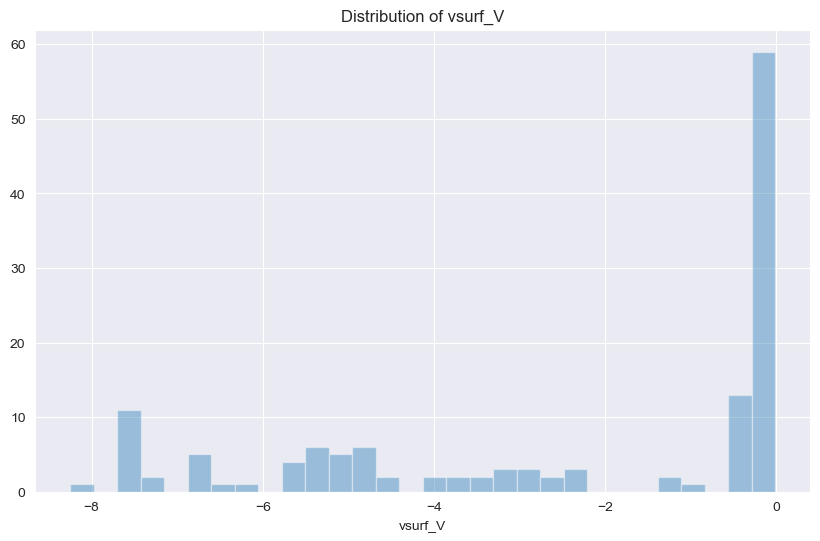

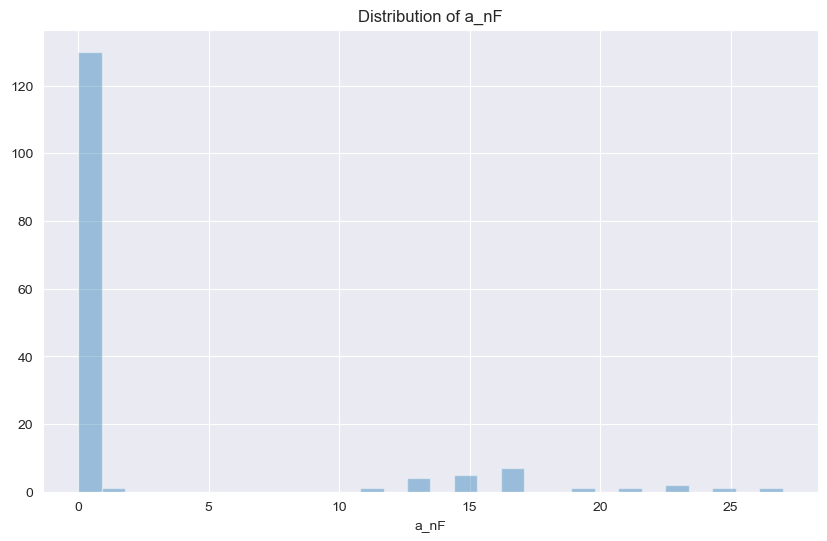

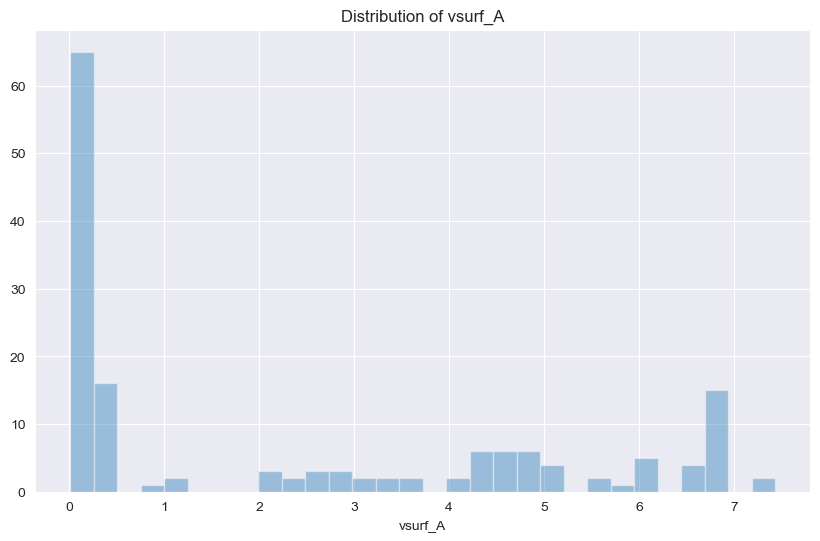

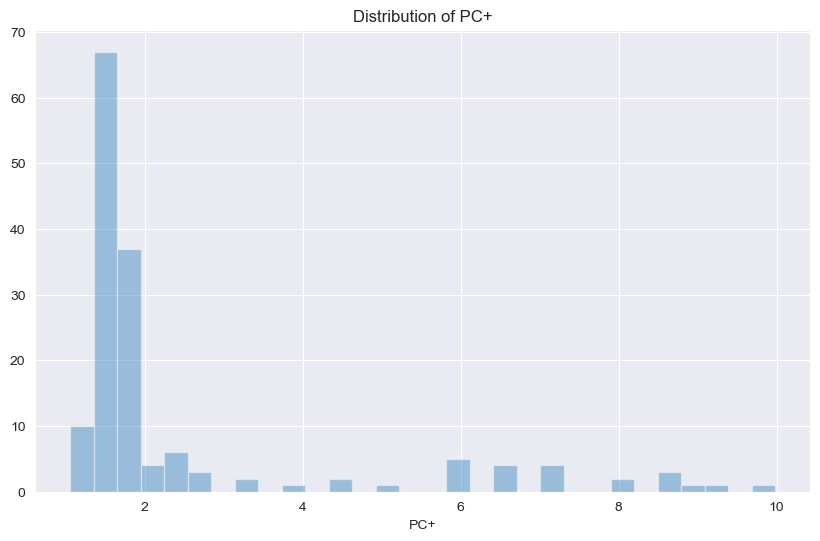

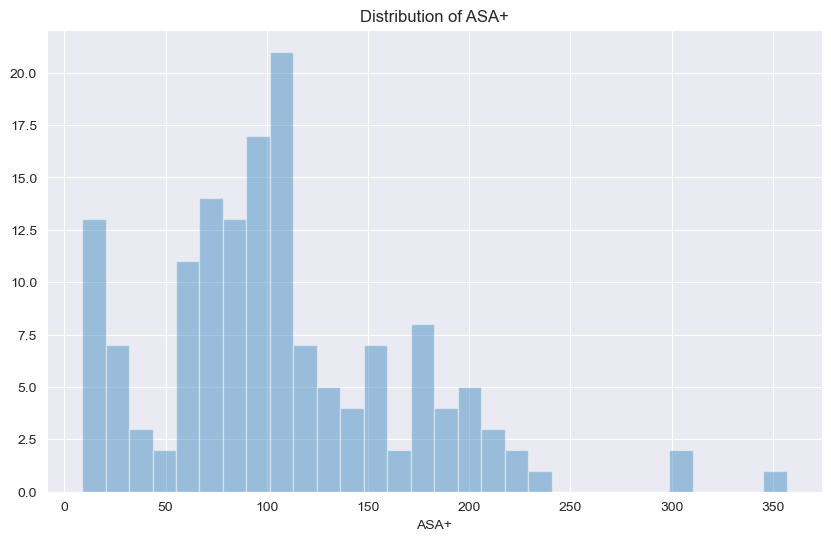

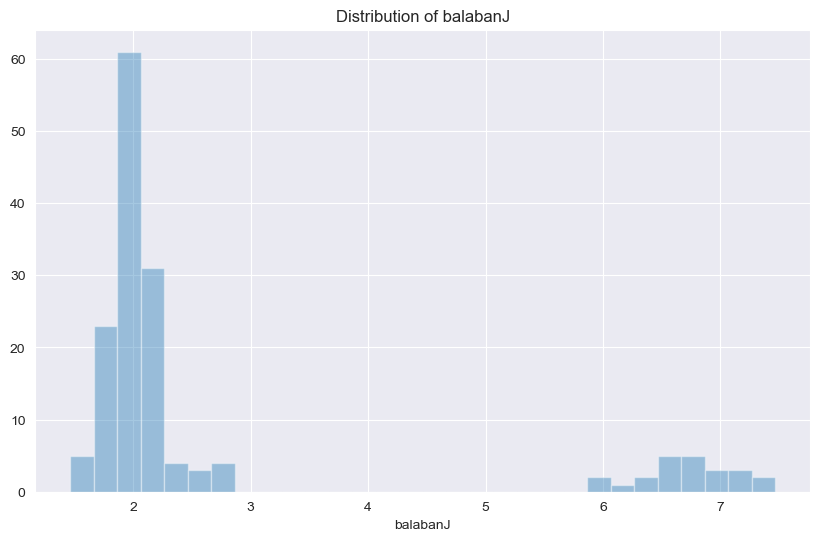

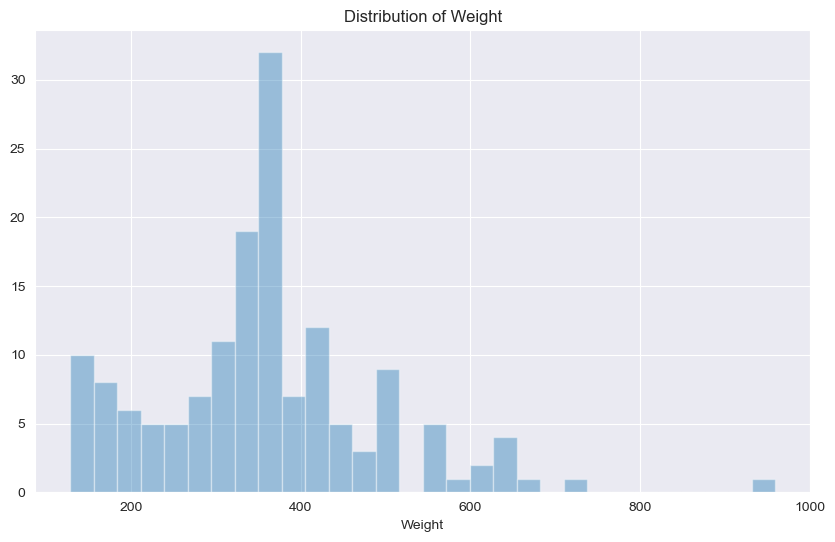

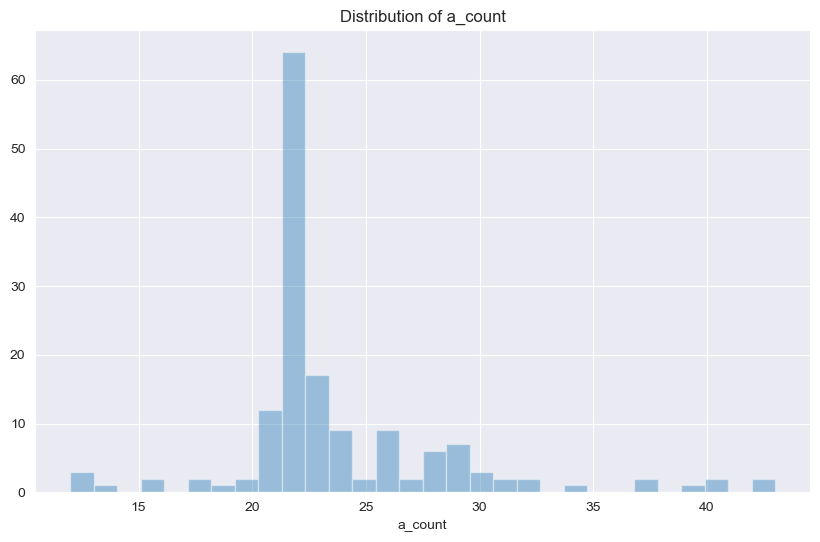

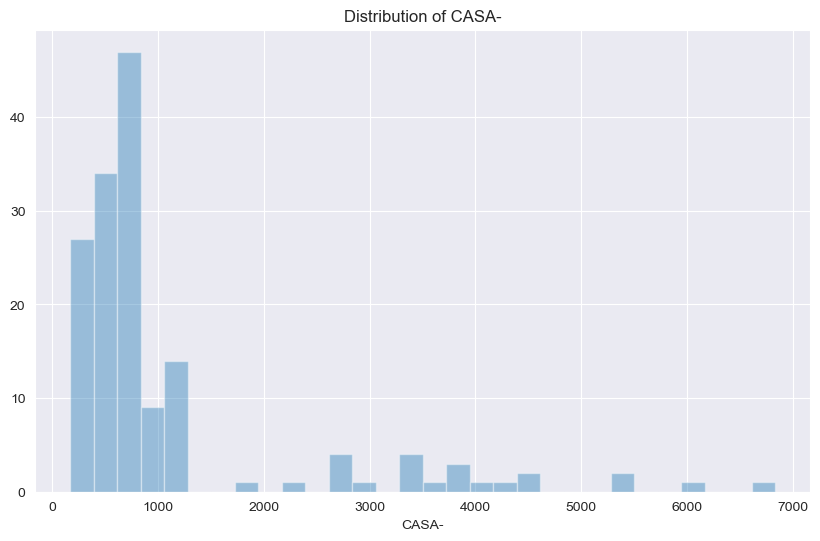

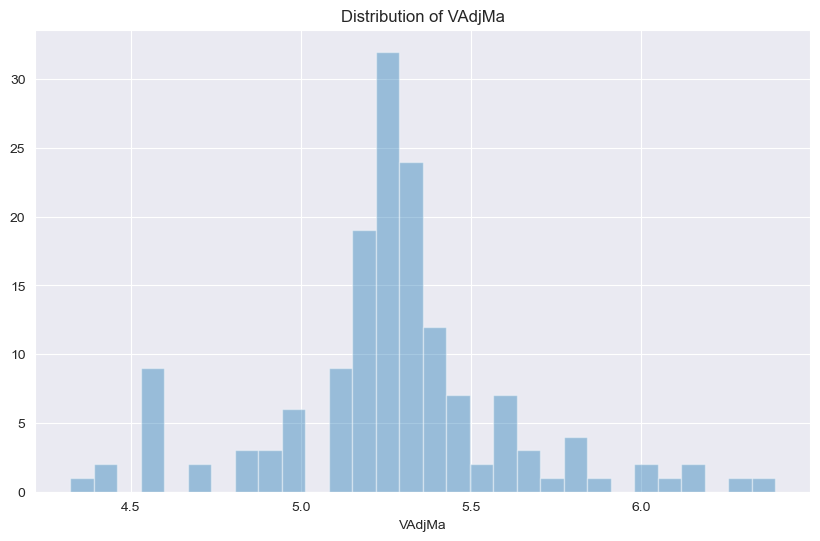

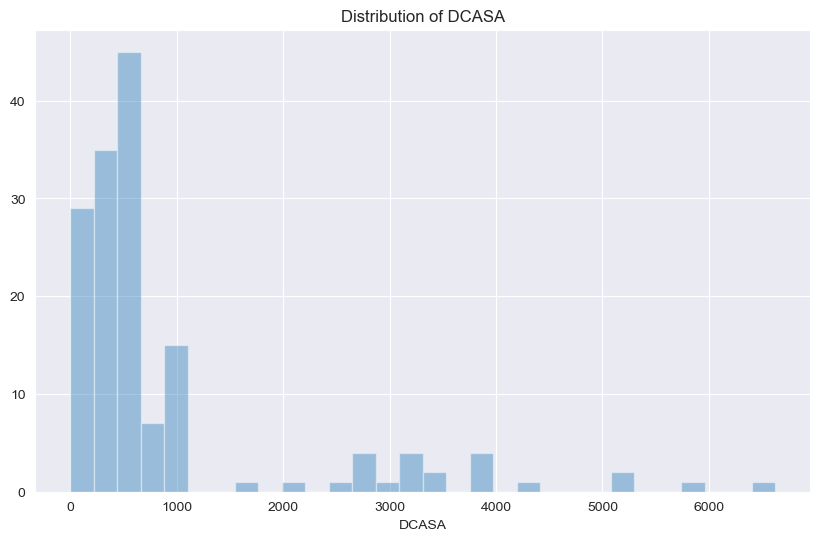

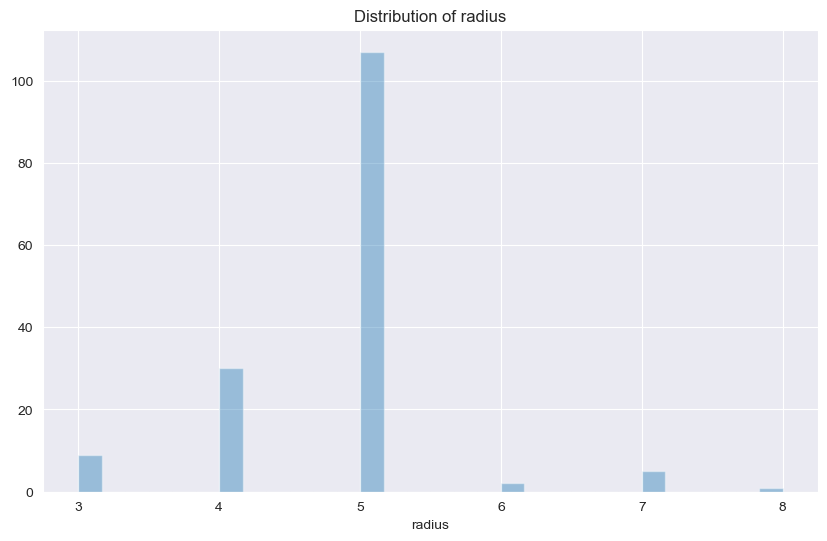

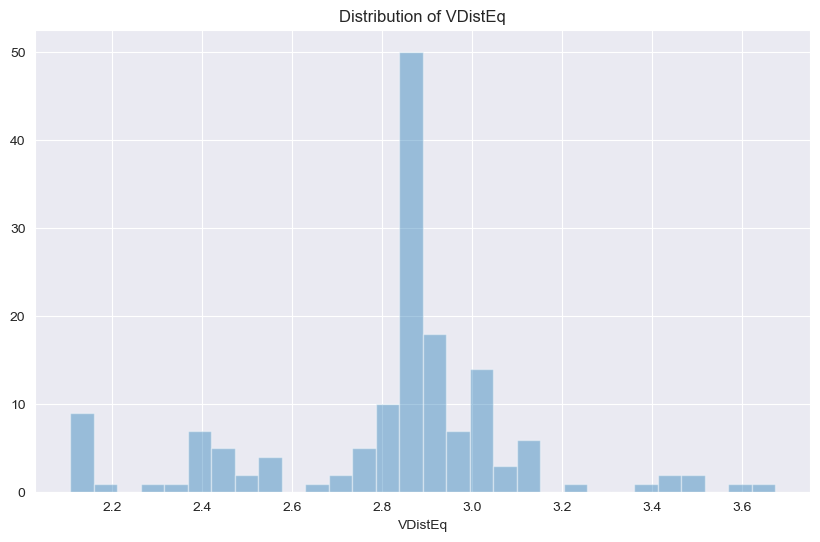

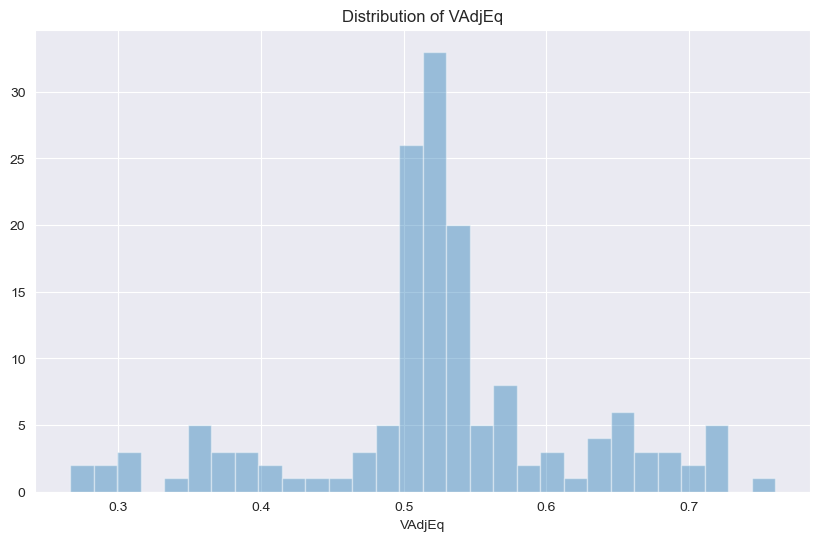

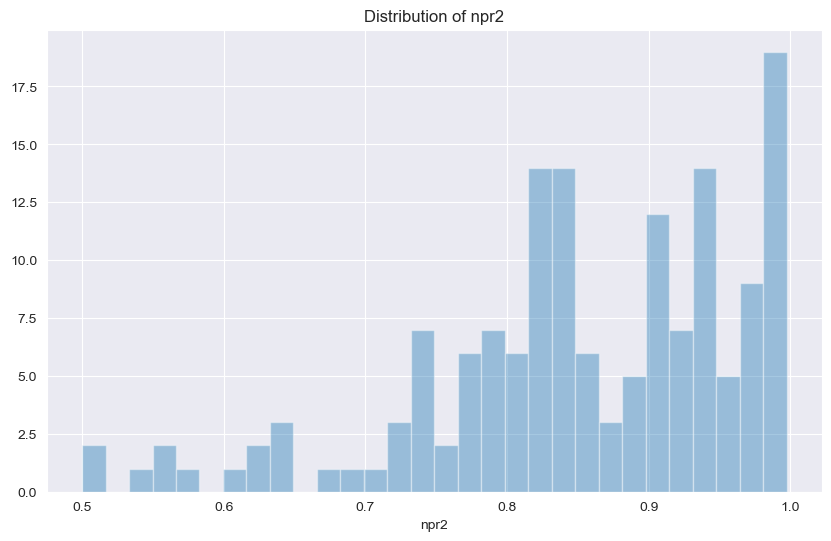

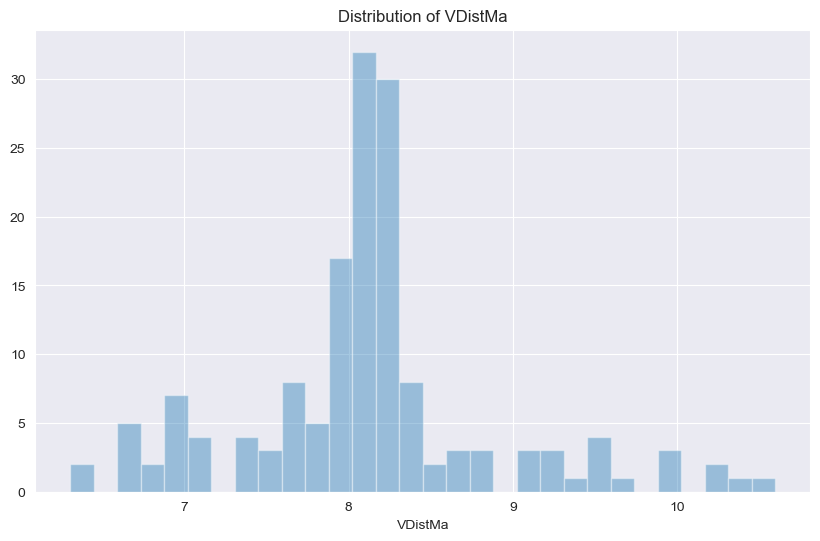

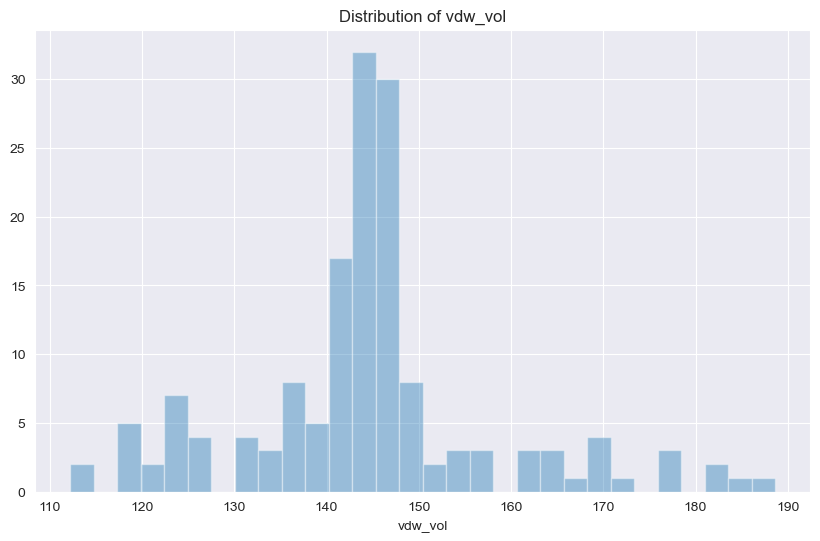

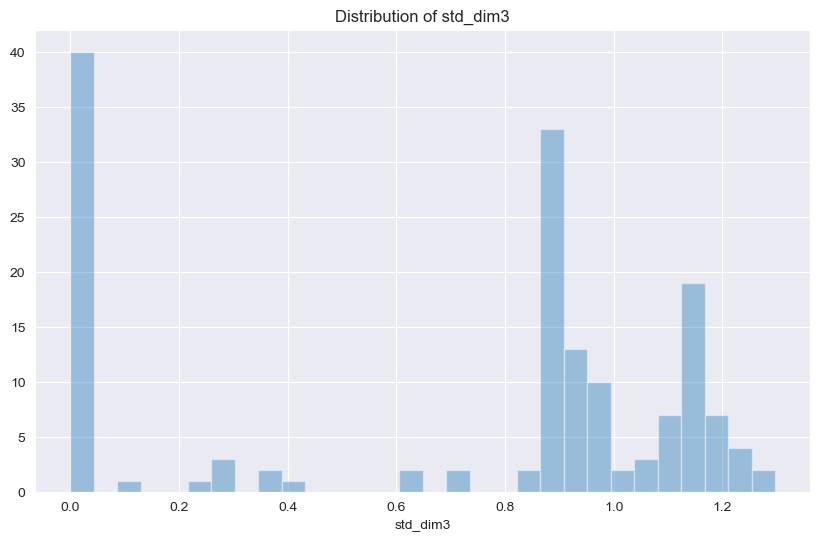

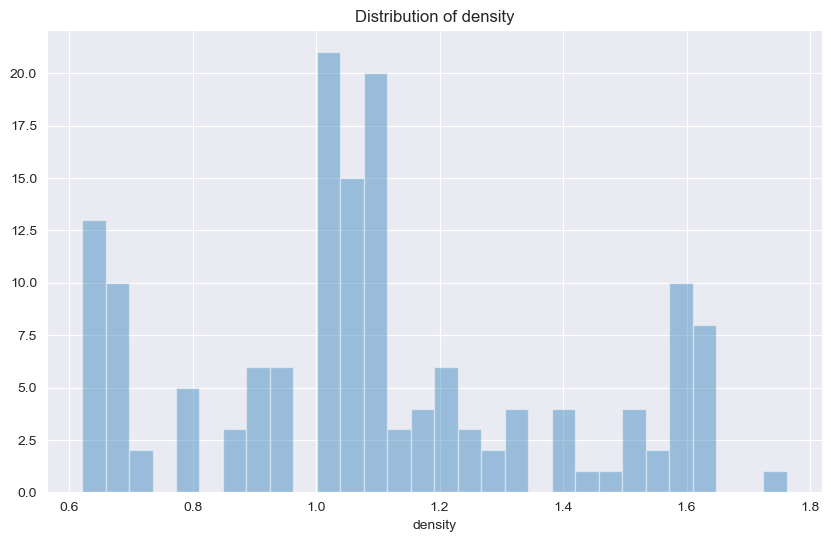

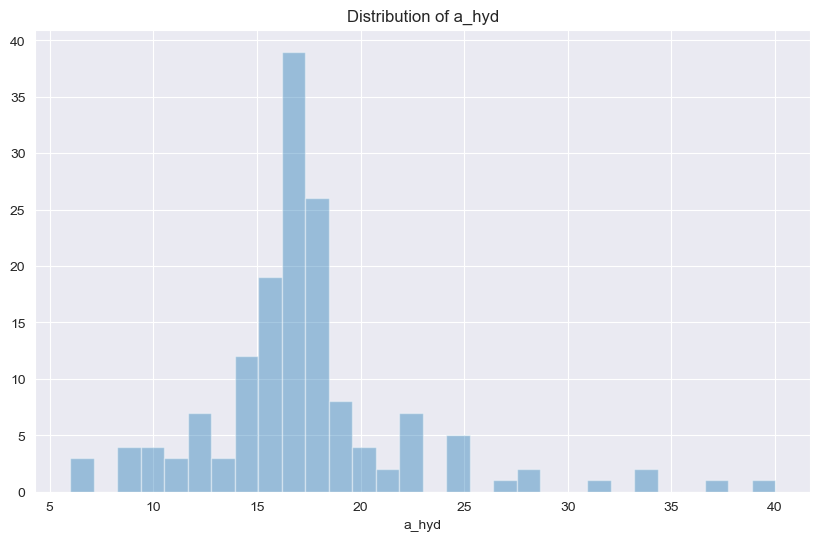

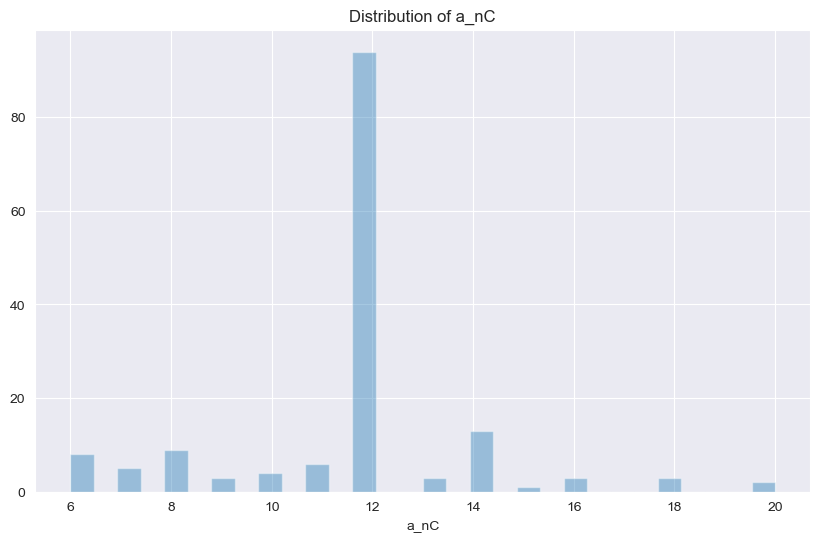

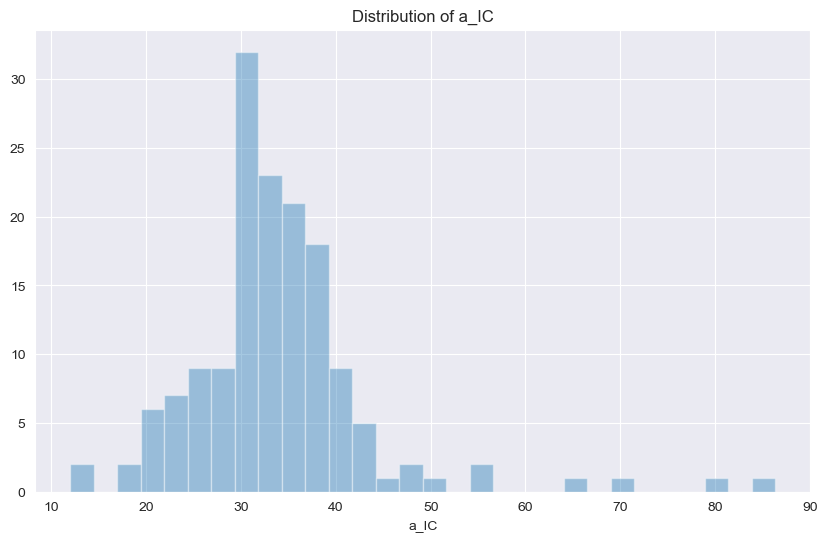

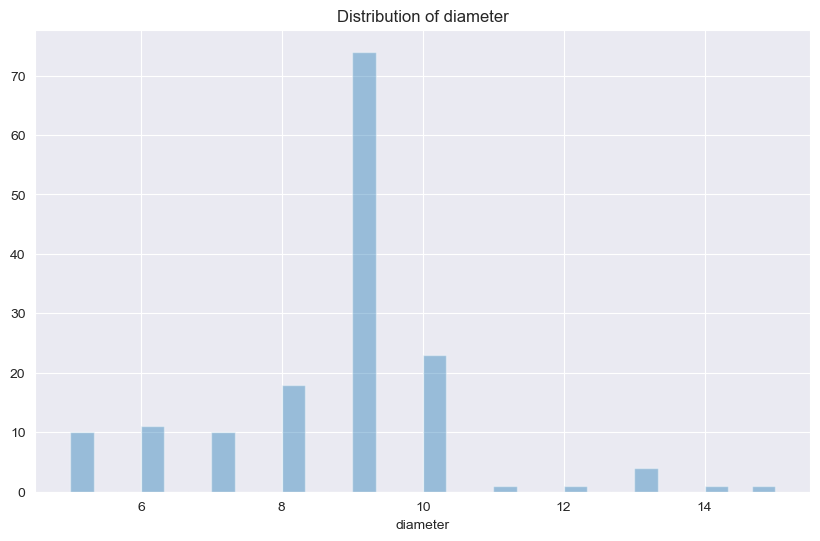

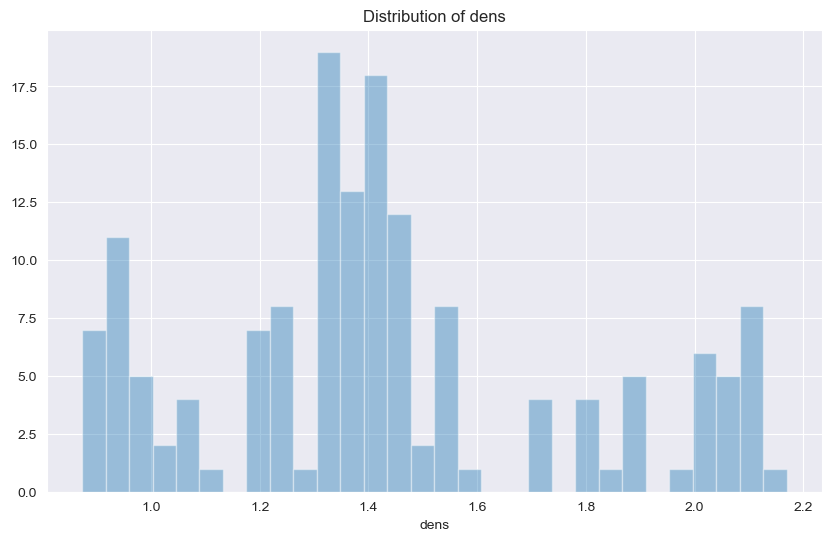

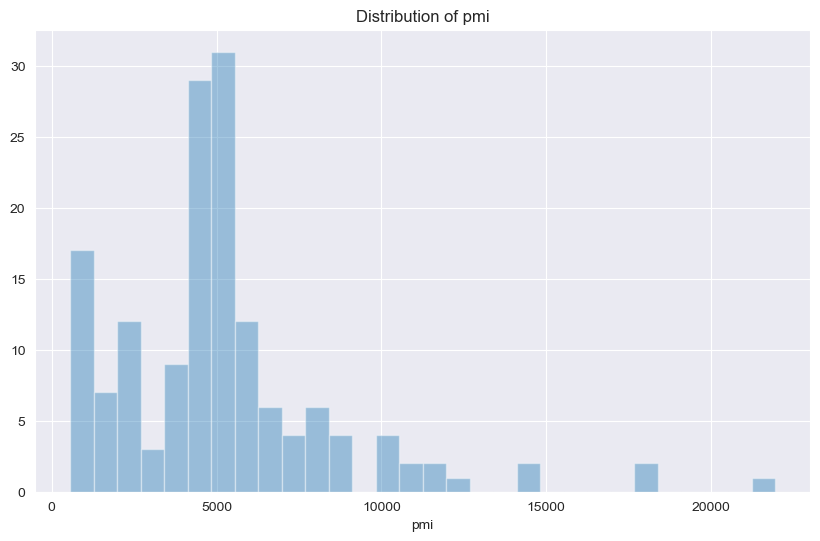

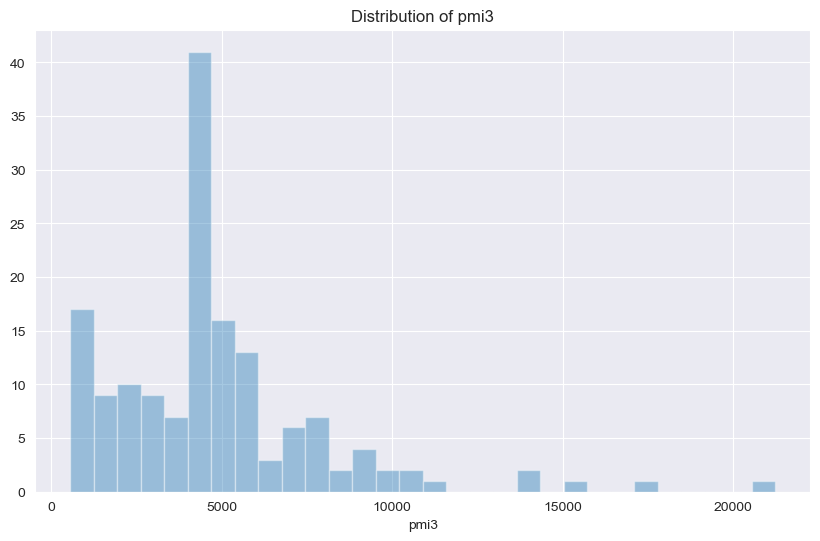

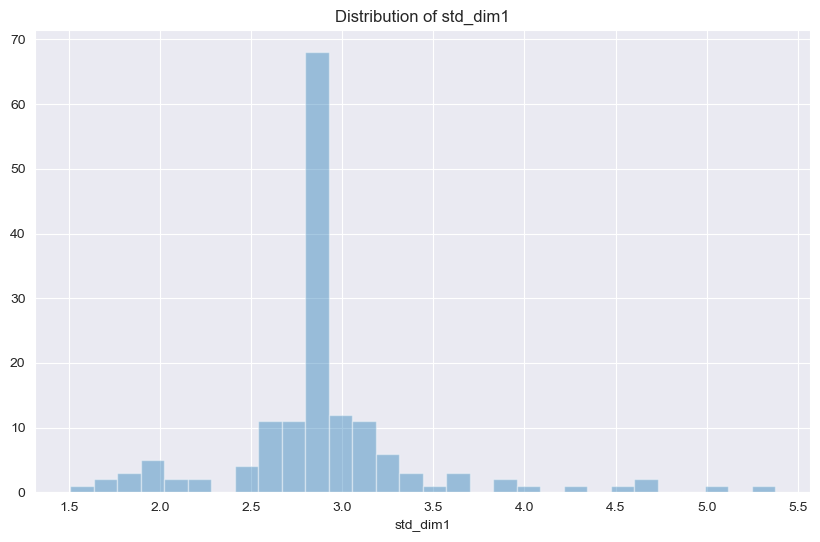

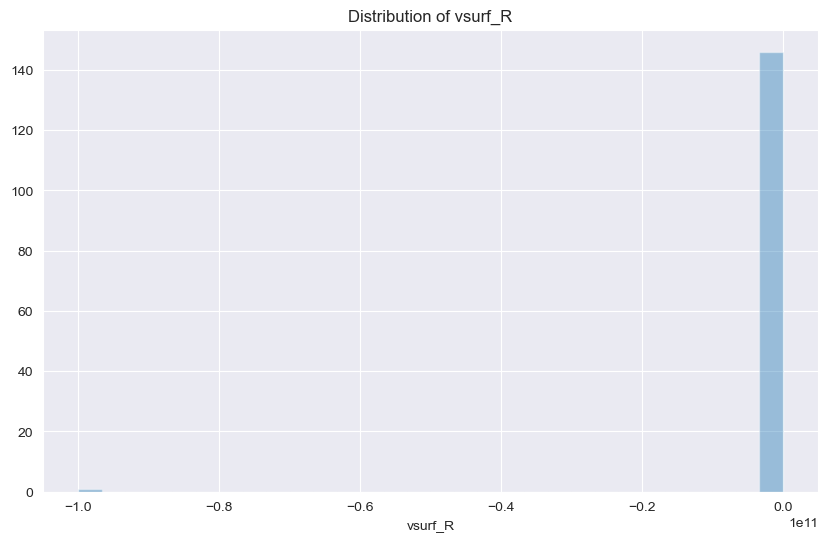

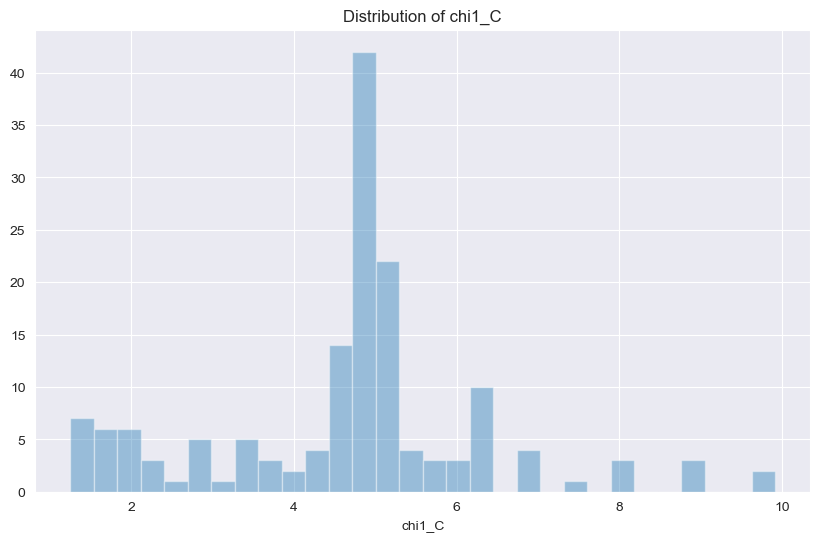

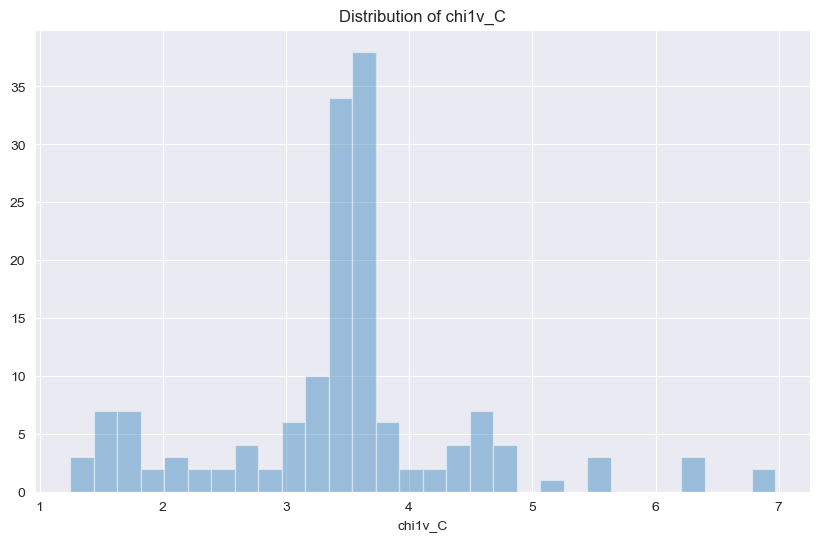

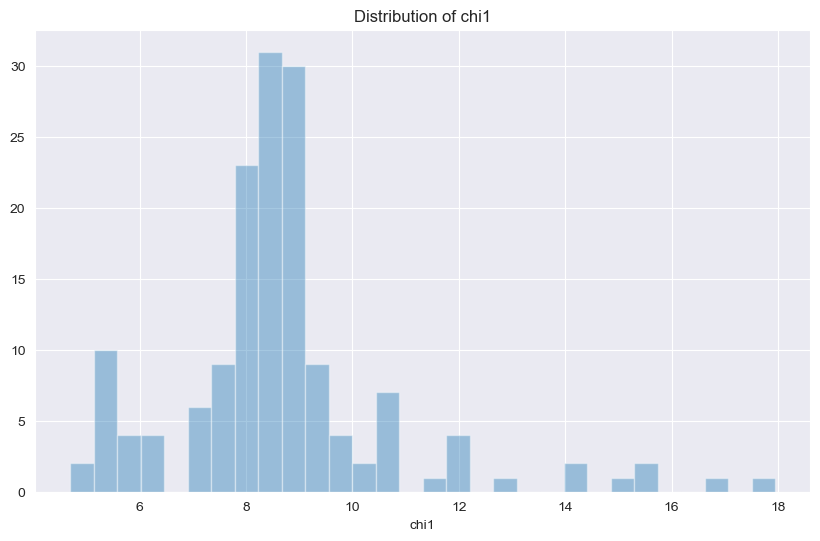

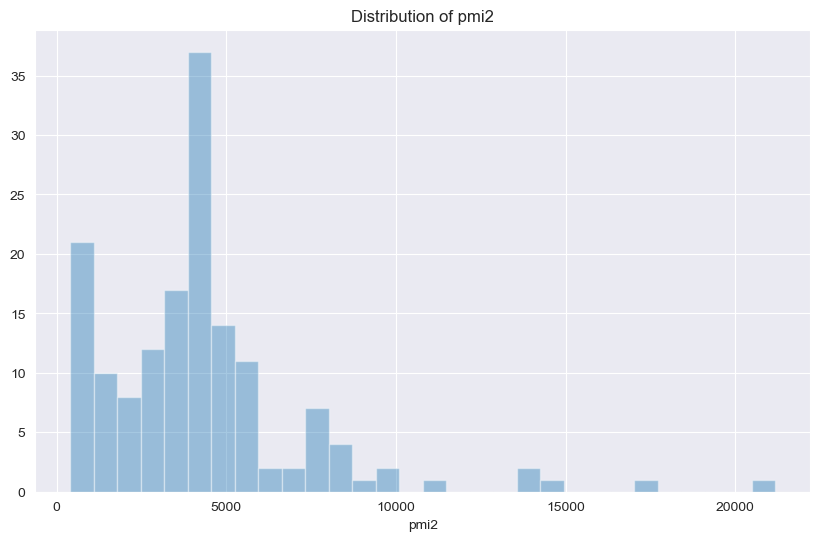

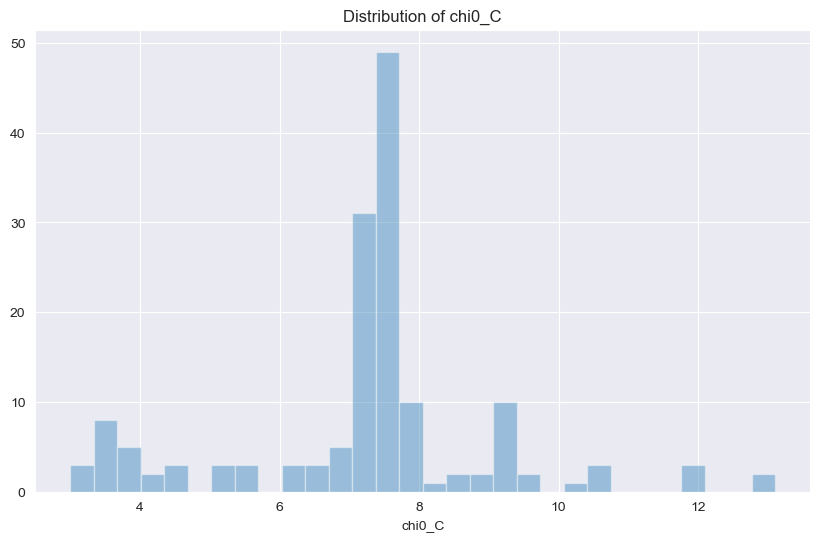

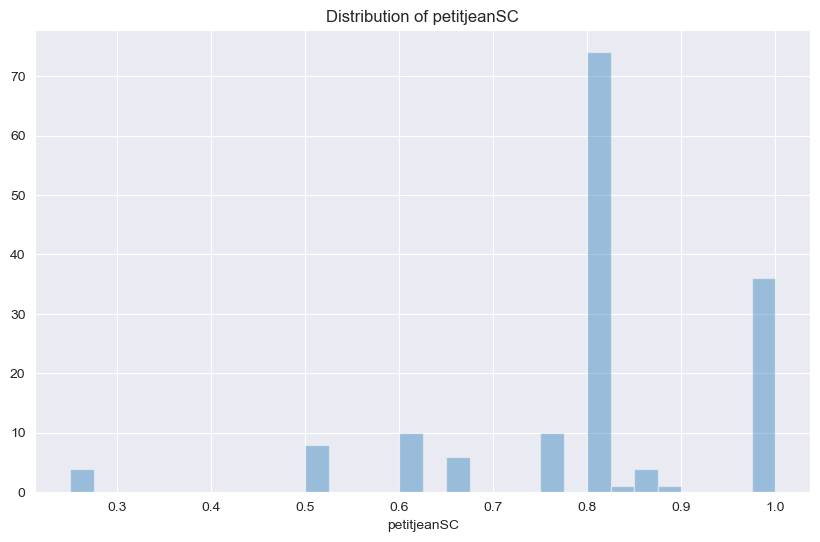

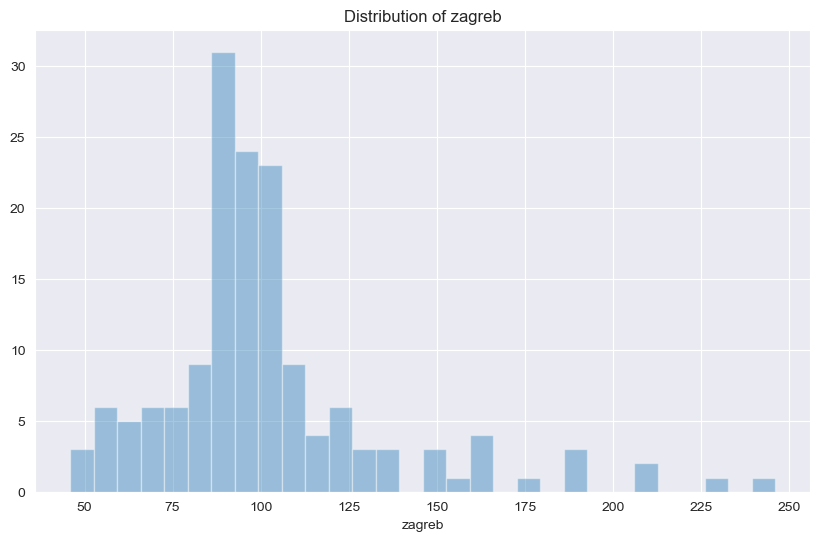

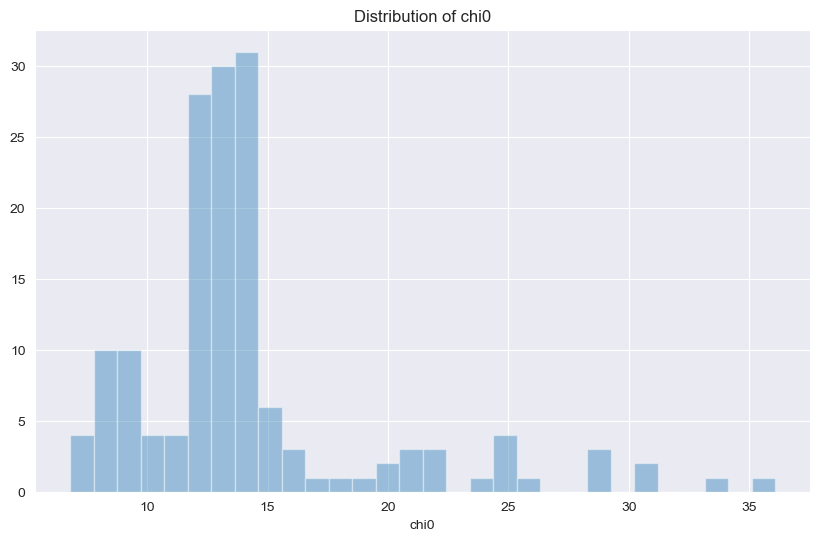

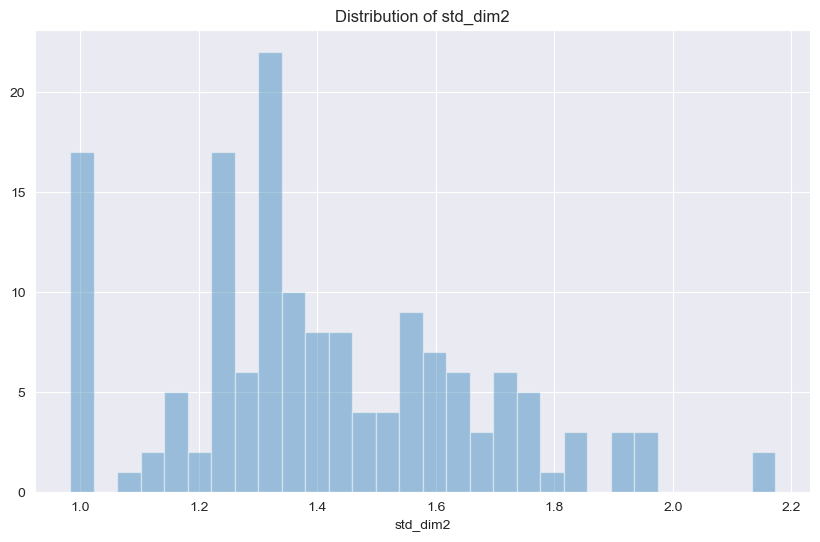

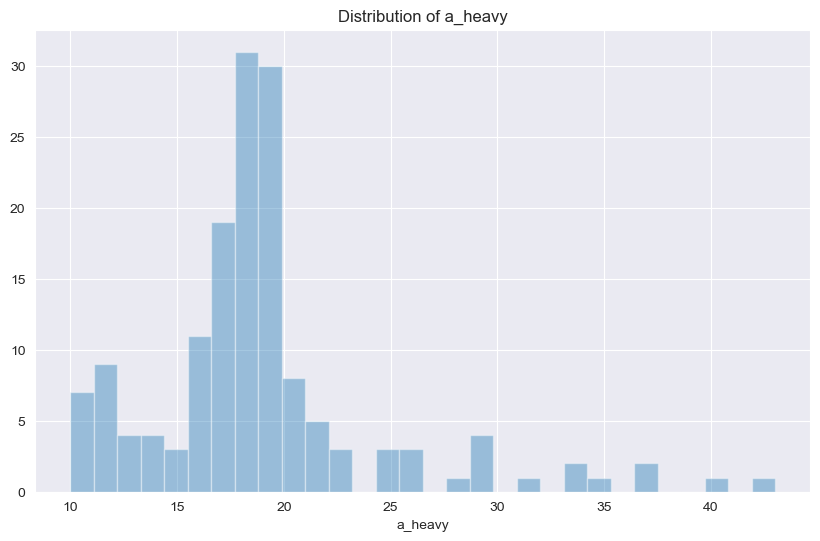

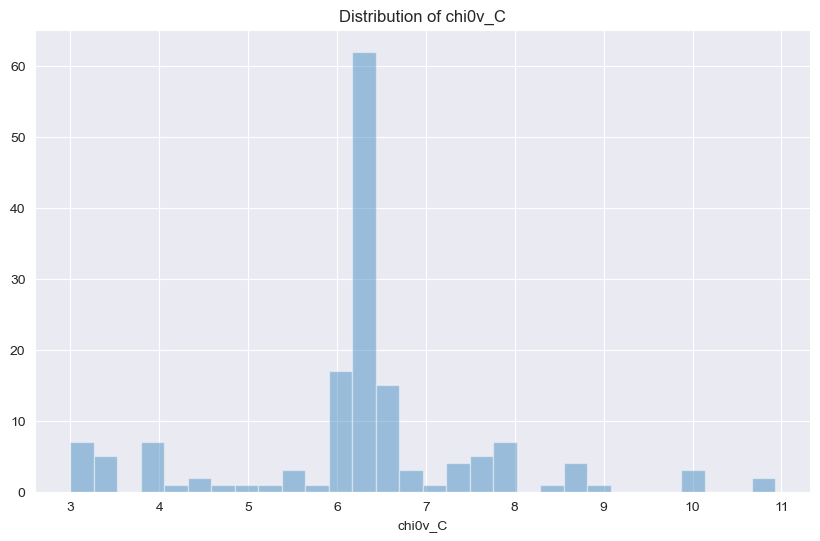

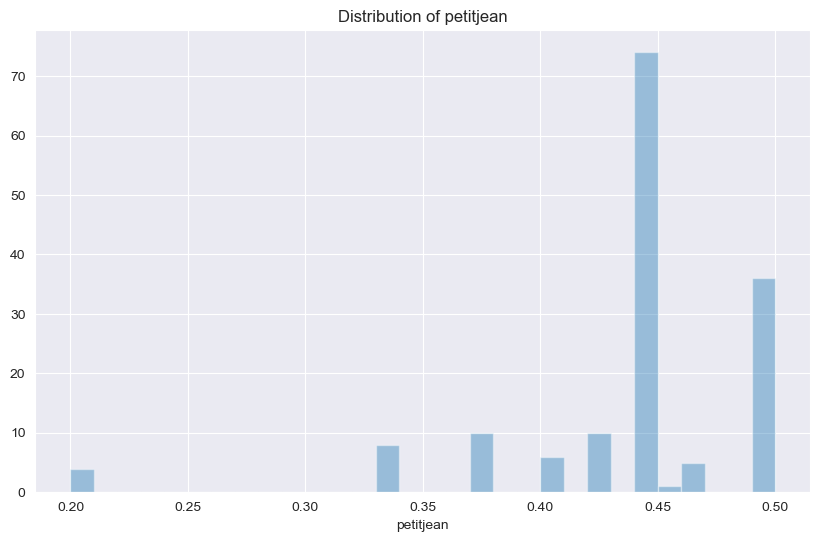

In [11]:
# Assuming 'data' is your DataFrame and 'top_10_attributes' is the list of top 10 attribute names
for attribute in top_10_attributes:
    plt.figure(figsize=(10, 6))
    sns.distplot(data[attribute], bins=30, kde=False)
    plt.title(f'Distribution of {attribute}')
    plt.show()